# Brand Analysis using Twitter

# Target brand: NIKE
Comparison brand: ADIDAS

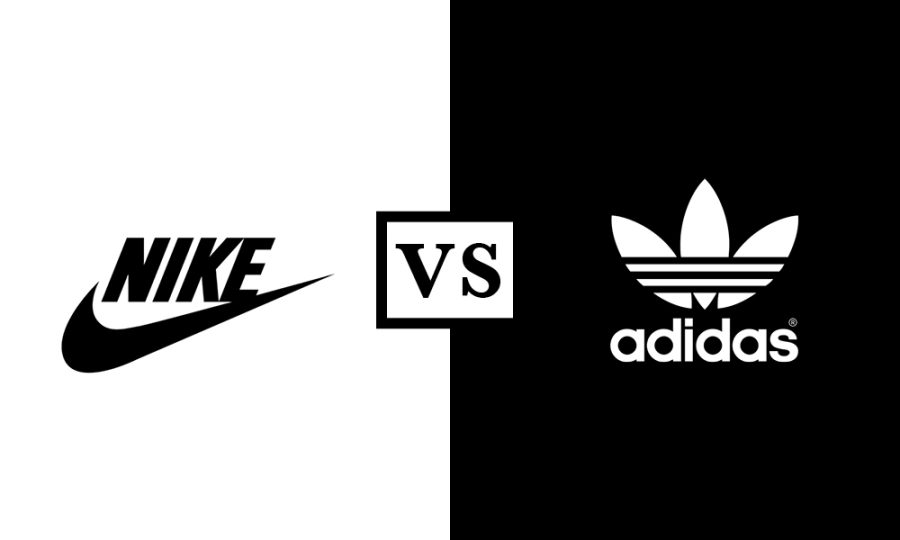

Importing librabries

In [244]:
# -- Import Libraries
import pandas as pd
import numpy as np

Loading data

In [245]:
# -- Load the csv files into one dataframe
nike = pd.read_csv('nike_3k.csv')
adidas = pd.read_csv('adidas_3k.csv')


# -- Check the shape of the dataframe
print('Data shape of nike:',nike.shape)


Data shape of nike: (3000, 15)


In [246]:
print('Data shape of adidas:',adidas.shape)

Data shape of adidas: (2805, 16)


In [247]:
nike.head(4)

author_id  statuses_count location  verified  followers_count  \
0  1.630000e+18               2   Sweden     False                0   
1  1.270000e+18             387      NaN     False               39   
2  1.190000e+18             409      NaN     False               19   
3  1.400000e+18             393      NaN     False              177   

   friends_count  listed_count  favourites_count      tweet_id  \
0             14             0                 0  1.630000e+18   
1            120             0              1381  1.630000e+18   
2             23             0                22  1.630000e+18   
3            188             0               795  1.630000e+18   

                                                text        created_at lang  \
0        #Nike  we open sone https://t.co/HkLHhgG7cc  23/02/2023 23:59   en   
1  Jordan year! #BHM #bhmkotd #nike #jordan #23 #...  23/02/2023 23:57   en   
2  Nike Dunk Low Teddy Bear\nDeadstock\nSize: 5W\...  23/02/2023 23:56   en   
3  Mapess – No Face Album Complet\n==)  https://t...  23/02/2023 23:54   en   

   retweet_count                                           hashtags  \
0              0              [{'text': 'Nike', 'indices': [0, 5]}]   
1              6  [{'text': 'BHM', 'indices': [13, 17]}, {'text'...   
2              0  [{'text': 'simplysneakers', 'indices': [56, 71...   
3              4  [{'text': 'Mapess', 'indices': [65, 72]}, {'te...   

   favorite_count  
0               0  
1              31  
2               0  
3               5

In [248]:
adidas.head(4)

Unnamed: 0            author_id  statuses_count                  location  \
0           0  1577322277531680771           18030                 Bazingaar   
1           1  1594365657663127552             126                       NaN   
2           2  1593071609983766528             820  United States of America   
3           3  1189667906977746944            2933                       NaN   

   verified  followers_count  friends_count  listed_count  favourites_count  \
0     False              276            572             1                 5   
1     False              393             62            11               324   
2     False                9             34             0               203   
3     False                7             26             0               870   

              tweet_id                                               text  \
0  1628903997636595713  adidas mens Tiro 21 Track Pants Black/White Me...   
1  1628903774940012546  Made this with blender3d #adidas @adidas @adid...   
2  1628900546756358146  So good I had to share! Check out all the item...   
3  1628900525210206208  So good I had to share! Check out all the item...   

            created_at lang  retweet_count  \
0  2023-02-23 23:45:51   en              1   
1  2023-02-23 23:44:58   en              0   
2  2023-02-23 23:32:08   en              0   
3  2023-02-23 23:32:03   en              0   

                                            hashtags  favorite_count  
0        [{'text': 'adidas', 'indices': [126, 133]}]               0  
1          [{'text': 'adidas', 'indices': [25, 32]}]               5  
2  [{'text': 'poshmark', 'indices': [97, 106]}, {...               0  
3  [{'text': 'poshmark', 'indices': [75, 84]}, {'...               0

# Data exploration and data cleaning for Target brand:NIKE

In [249]:
 nike.isnull(). sum()

author_id             0
statuses_count        0
location            977
verified              0
followers_count       0
friends_count         0
listed_count          0
favourites_count      0
tweet_id              0
text                  0
created_at            0
lang                  0
retweet_count         0
hashtags              0
favorite_count        0
dtype: int64

In [250]:
# Check data types and missing values
print(nike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   author_id         3000 non-null   float64
 1   statuses_count    3000 non-null   int64  
 2   location          2023 non-null   object 
 3   verified          3000 non-null   bool   
 4   followers_count   3000 non-null   int64  
 5   friends_count     3000 non-null   int64  
 6   listed_count      3000 non-null   int64  
 7   favourites_count  3000 non-null   int64  
 8   tweet_id          3000 non-null   float64
 9   text              3000 non-null   object 
 10  created_at        3000 non-null   object 
 11  lang              3000 non-null   object 
 12  retweet_count     3000 non-null   int64  
 13  hashtags          3000 non-null   object 
 14  favorite_count    3000 non-null   int64  
dtypes: bool(1), float64(2), int64(7), object(5)
memory usage: 331.2+ KB
None


In [251]:
# Summary statistics
print(nike.describe())

          author_id  statuses_count  followers_count  friends_count  \
count  3.000000e+03    3.000000e+03     3.000000e+03    3000.000000   
mean   9.619754e+17    3.192717e+04     4.070360e+03     918.593000   
std    6.871684e+17    2.320347e+05     4.913546e+04    7524.841346   
min    3.213801e+06    1.000000e+00     0.000000e+00       0.000000   
25%    2.205447e+09    1.404000e+03     4.000000e+00       9.000000   
50%    1.310000e+18    3.106000e+03     2.300000e+01      55.000000   
75%    1.570000e+18    5.823500e+03     2.530000e+02     297.000000   
max    1.630000e+18    2.929267e+06     2.300493e+06  181897.000000   

       listed_count  favourites_count      tweet_id  retweet_count  \
count   3000.000000       3000.000000  3.000000e+03    3000.000000   
mean      22.868000       4716.561667  1.630445e+18       0.354667   
std      127.302634      22605.728659  6.311742e+14       4.523756   
min        0.000000          0.000000  1.630000e+18       0.000000   
25%       

In [252]:
nike.columns

Index(['author_id', 'statuses_count', 'location', 'verified',
       'followers_count', 'friends_count', 'listed_count', 'favourites_count',
       'tweet_id', 'text', 'created_at', 'lang', 'retweet_count', 'hashtags',
       'favorite_count'],
      dtype='object')

# Data exploration and data cleaning for Comparison brand:ADIDAS

In [253]:
 adidas.isnull(). sum()

Unnamed: 0             0
author_id              0
statuses_count         0
location            1257
verified               0
followers_count        0
friends_count          0
listed_count           0
favourites_count       0
tweet_id               0
text                   0
created_at             0
lang                   0
retweet_count          0
hashtags               0
favorite_count         0
dtype: int64

In [254]:
# Check data types and missing values
print(adidas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        2805 non-null   int64 
 1   author_id         2805 non-null   int64 
 2   statuses_count    2805 non-null   int64 
 3   location          1548 non-null   object
 4   verified          2805 non-null   bool  
 5   followers_count   2805 non-null   int64 
 6   friends_count     2805 non-null   int64 
 7   listed_count      2805 non-null   int64 
 8   favourites_count  2805 non-null   int64 
 9   tweet_id          2805 non-null   int64 
 10  text              2805 non-null   object
 11  created_at        2805 non-null   object
 12  lang              2805 non-null   object
 13  retweet_count     2805 non-null   int64 
 14  hashtags          2805 non-null   object
 15  favorite_count    2805 non-null   int64 
dtypes: bool(1), int64(10), object(5)
memory usage: 331.6+ KB
Non

In [255]:
# Summary statistics
print(adidas.describe())

        Unnamed: 0     author_id  statuses_count  followers_count  \
count  2805.000000  2.805000e+03    2.805000e+03      2805.000000   
mean    468.155437  8.014692e+17    3.708910e+04     11679.789661   
std     271.992968  6.851044e+17    1.616888e+05     52574.684551   
min       0.000000  7.911012e+06    1.000000e+00         0.000000   
25%     233.000000  8.427993e+08    1.229000e+03        25.000000   
50%     467.000000  1.060342e+18    4.157000e+03        93.000000   
75%     701.000000  1.495893e+18    1.252500e+04       559.000000   
max     999.000000  1.630257e+18    2.929251e+06    839523.000000   

       friends_count  listed_count  favourites_count      tweet_id  \
count    2805.000000   2805.000000       2805.000000  2.805000e+03   
mean      638.129055     55.142959       4485.093761  1.629791e+18   
std      2081.657510    229.994630      17417.637261  1.052235e+15   
min         0.000000      0.000000          0.000000  1.628183e+18   
25%        34.000000      0.

In [256]:
adidas.columns

Index(['Unnamed: 0', 'author_id', 'statuses_count', 'location', 'verified',
       'followers_count', 'friends_count', 'listed_count', 'favourites_count',
       'tweet_id', 'text', 'created_at', 'lang', 'retweet_count', 'hashtags',
       'favorite_count'],
      dtype='object')

In [257]:
#removing column unnamed from adidas dataset
adidas = adidas.drop(columns=['Unnamed: 0']) 

In [258]:
adidas.columns

Index(['author_id', 'statuses_count', 'location', 'verified',
       'followers_count', 'friends_count', 'listed_count', 'favourites_count',
       'tweet_id', 'text', 'created_at', 'lang', 'retweet_count', 'hashtags',
       'favorite_count'],
      dtype='object')

In [259]:
# Summary statistics without unnamed column
print(adidas.describe())

          author_id  statuses_count  followers_count  friends_count  \
count  2.805000e+03    2.805000e+03      2805.000000    2805.000000   
mean   8.014692e+17    3.708910e+04     11679.789661     638.129055   
std    6.851044e+17    1.616888e+05     52574.684551    2081.657510   
min    7.911012e+06    1.000000e+00         0.000000       0.000000   
25%    8.427993e+08    1.229000e+03        25.000000      34.000000   
50%    1.060342e+18    4.157000e+03        93.000000     120.000000   
75%    1.495893e+18    1.252500e+04       559.000000     543.000000   
max    1.630257e+18    2.929251e+06    839523.000000   66665.000000   

       listed_count  favourites_count      tweet_id  retweet_count  \
count   2805.000000       2805.000000  2.805000e+03    2805.000000   
mean      55.142959       4485.093761  1.629791e+18       0.385383   
std      229.994630      17417.637261  1.052235e+15       3.279557   
min        0.000000          0.000000  1.628183e+18       0.000000   
25%       

# Data Preprocessing for Target brand NIKE

In [260]:
text_df = nike
text_df.head()


author_id  statuses_count location  verified  followers_count  \
0  1.630000e+18               2   Sweden     False                0   
1  1.270000e+18             387      NaN     False               39   
2  1.190000e+18             409      NaN     False               19   
3  1.400000e+18             393      NaN     False              177   
4  1.400000e+18             393      NaN     False              177   

   friends_count  listed_count  favourites_count      tweet_id  \
0             14             0                 0  1.630000e+18   
1            120             0              1381  1.630000e+18   
2             23             0                22  1.630000e+18   
3            188             0               795  1.630000e+18   
4            188             0               795  1.630000e+18   

                                                text        created_at lang  \
0        #Nike  we open sone https://t.co/HkLHhgG7cc  23/02/2023 23:59   en   
1  Jordan year! #BHM #bhmkotd #nike #jordan #23 #...  23/02/2023 23:57   en   
2  Nike Dunk Low Teddy Bear\nDeadstock\nSize: 5W\...  23/02/2023 23:56   en   
3  Mapess – No Face Album Complet\n==)  https://t...  23/02/2023 23:54   en   
4  Landy – BRAVE  Album Complet\n==)  https://t.c...  23/02/2023 23:54   en   

   retweet_count                                           hashtags  \
0              0              [{'text': 'Nike', 'indices': [0, 5]}]   
1              6  [{'text': 'BHM', 'indices': [13, 17]}, {'text'...   
2              0  [{'text': 'simplysneakers', 'indices': [56, 71...   
3              4  [{'text': 'Mapess', 'indices': [65, 72]}, {'te...   
4              4  [{'text': 'landy', 'indices': [63, 69]}, {'tex...   

   favorite_count  
0               0  
1              31  
2               0  
3               5  
4               5

In [261]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

#Nike  we open sone https://t.co/HkLHhgG7cc 

Jordan year! #BHM #bhmkotd #nike #jordan #23 #jordan1OG where it all began! https://t.co/XAuajJg60o 

Nike Dunk Low Teddy Bear
Deadstock
Size: 5W
Price: $185
#simplysneakers #nike #dunklow #teddybear #fashion #kicks #sneakers #sneakerheads #smallbusiness #kickstagram #follow #support https://t.co/pia9uCEiHz 

Mapess – No Face Album Complet
==)  https://t.co/StKvGn0EBj
🔥🔥🔥 
#Mapess #Kaaris #lacrim #LilBaby #ninho #Niro #leak #AyaNakamura #niska #booba #deezerfr #6ix9ine  #zikrap #33rap #leakrap #Nike  #jul #PSG #music #Musique #Album #SONGS #chanson #Singles #Kultur #media #kisses https://t.co/1XndveKfgs 

Landy – BRAVE  Album Complet
==)  https://t.co/StKvGn0EBj
🔥🔥🔥 
#landy #Kaaris #lacrim #LilBaby #ninho #Niro #leak #AyaNakamura #niska #booba #deezerfr #6ix9ine  #zikrap #33rap #leakrap #Nike  #jul #PSG #music #Musique #Album #SONGS #chanson #Singles #Kultur #media #kisses https://t.co/kNZsYoiUkT 



In [262]:
import re

# Define regular expression pattern to find animations
animation_pattern = r'\banimations?\b'

# Function to remove animations from text
def remove_animations(text):
    return re.sub(animation_pattern, '', text)

# Apply the function to the 'text' column
text_df['text'] = text_df['text'].apply(remove_animations)

In [263]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   author_id         3000 non-null   float64
 1   statuses_count    3000 non-null   int64  
 2   location          2023 non-null   object 
 3   verified          3000 non-null   bool   
 4   followers_count   3000 non-null   int64  
 5   friends_count     3000 non-null   int64  
 6   listed_count      3000 non-null   int64  
 7   favourites_count  3000 non-null   int64  
 8   tweet_id          3000 non-null   float64
 9   text              3000 non-null   object 
 10  created_at        3000 non-null   object 
 11  lang              3000 non-null   object 
 12  retweet_count     3000 non-null   int64  
 13  hashtags          3000 non-null   object 
 14  favorite_count    3000 non-null   int64  
dtypes: bool(1), float64(2), int64(7), object(5)
memory usage: 331.2+ KB


In [264]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [265]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# Define the stopwords set
stop_words = set(stopwords.words('english'))

text_df.text = text_df['text'].apply(data_processing)

In [266]:
text_df = text_df.drop_duplicates('text')

In [267]:
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [268]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

<ipython-input-268-f020c132d43d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text'] = text_df['text'].apply(lambda x: stemming(x))


In [269]:
text_df.head()

author_id  statuses_count location  verified  followers_count  \
0  1.630000e+18               2   Sweden     False                0   
1  1.270000e+18             387      NaN     False               39   
2  1.190000e+18             409      NaN     False               19   
3  1.400000e+18             393      NaN     False              177   
4  1.400000e+18             393      NaN     False              177   

   friends_count  listed_count  favourites_count      tweet_id  \
0             14             0                 0  1.630000e+18   
1            120             0              1381  1.630000e+18   
2             23             0                22  1.630000e+18   
3            188             0               795  1.630000e+18   
4            188             0               795  1.630000e+18   

                                                text        created_at lang  \
0                                     nike open sone  23/02/2023 23:59   en   
1  jordan year bhm bhmkotd nike jordan 23 jordan1...  23/02/2023 23:57   en   
2  nike dunk low teddy bear deadstock size 5w pri...  23/02/2023 23:56   en   
3  mapess face album complet mapess kaaris lacrim...  23/02/2023 23:54   en   
4  landy brave album complet landy kaaris lacrim ...  23/02/2023 23:54   en   

   retweet_count                                           hashtags  \
0              0              [{'text': 'Nike', 'indices': [0, 5]}]   
1              6  [{'text': 'BHM', 'indices': [13, 17]}, {'text'...   
2              0  [{'text': 'simplysneakers', 'indices': [56, 71...   
3              4  [{'text': 'Mapess', 'indices': [65, 72]}, {'te...   
4              4  [{'text': 'landy', 'indices': [63, 69]}, {'tex...   

   favorite_count  
0               0  
1              31  
2               0  
3               5  
4               5

In [270]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

nike open sone 

jordan year bhm bhmkotd nike jordan 23 jordan1og began 

nike dunk low teddy bear deadstock size 5w price 185 simplysneakers nike dunklow teddybear fashion kicks sneakers sneakerheads smallbusiness kickstagram follow support 

mapess face album complet mapess kaaris lacrim lilbaby ninho niro leak ayanakamura niska booba deezerfr 6ix9ine zikrap 33rap leakrap nike jul psg music musique album songs chanson singles kultur media kisses 

landy brave album complet landy kaaris lacrim lilbaby ninho niro leak ayanakamura niska booba deezerfr 6ix9ine zikrap 33rap leakrap nike jul psg music musique album songs chanson singles kultur media kisses 



In [271]:
#cleaned text dataset for nike
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2776 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   author_id         2776 non-null   float64
 1   statuses_count    2776 non-null   int64  
 2   location          1901 non-null   object 
 3   verified          2776 non-null   bool   
 4   followers_count   2776 non-null   int64  
 5   friends_count     2776 non-null   int64  
 6   listed_count      2776 non-null   int64  
 7   favourites_count  2776 non-null   int64  
 8   tweet_id          2776 non-null   float64
 9   text              2776 non-null   object 
 10  created_at        2776 non-null   object 
 11  lang              2776 non-null   object 
 12  retweet_count     2776 non-null   int64  
 13  hashtags          2776 non-null   object 
 14  favorite_count    2776 non-null   int64  
dtypes: bool(1), float64(2), int64(7), object(5)
memory usage: 328.0+ KB


In [272]:
# -- Drop duplicated rows
text_df = text_df.drop_duplicates()
print('data shape:',text_df.shape)

data shape: (2776, 15)


# Data Preprocessing for Comparison brand ADIDAS

In [273]:
text_df1 = adidas
text_df1.head()


author_id  statuses_count                  location  verified  \
0  1577322277531680771           18030                 Bazingaar     False   
1  1594365657663127552             126                       NaN     False   
2  1593071609983766528             820  United States of America     False   
3  1189667906977746944            2933                       NaN     False   
4  1254605184447242242             787                       NaN     False   

   followers_count  friends_count  listed_count  favourites_count  \
0              276            572             1                 5   
1              393             62            11               324   
2                9             34             0               203   
3                7             26             0               870   
4               11              0             1                 0   

              tweet_id                                               text  \
0  1628903997636595713  adidas mens Tiro 21 Track Pants Black/White Me...   
1  1628903774940012546  Made this with blender3d #adidas @adidas @adid...   
2  1628900546756358146  So good I had to share! Check out all the item...   
3  1628900525210206208  So good I had to share! Check out all the item...   
4  1628900494201720832  So good I had to share! Check out all the item...   

            created_at lang  retweet_count  \
0  2023-02-23 23:45:51   en              1   
1  2023-02-23 23:44:58   en              0   
2  2023-02-23 23:32:08   en              0   
3  2023-02-23 23:32:03   en              0   
4  2023-02-23 23:31:55   en              0   

                                            hashtags  favorite_count  
0        [{'text': 'adidas', 'indices': [126, 133]}]               0  
1          [{'text': 'adidas', 'indices': [25, 32]}]               5  
2  [{'text': 'poshmark', 'indices': [97, 106]}, {...               0  
3  [{'text': 'poshmark', 'indices': [75, 84]}, {'...               0  
4  [{'text': 'poshmark', 'indices': [93, 102]}, {...               0

In [274]:
print(text_df1['text'].iloc[0],"\n")
print(text_df1['text'].iloc[1],"\n")
print(text_df1['text'].iloc[2],"\n")
print(text_df1['text'].iloc[3],"\n")
print(text_df1['text'].iloc[4],"\n")

adidas mens Tiro 21 Track Pants Black/White Medium

 LINK: 
 https://t.co/6iy3KSaaUO
 
 Price: $30.11
 Discount: $14.89 (33%)
#adidas https://t.co/Hpm4vghQlP 

Made this with blender3d #adidas @adidas @adidasoriginals @adidasUS https://t.co/xN2dqmcCxp 

So good I had to share! Check out all the items I'm loving on @Poshmarkapp from @Studio6ThisThat #poshmark #fashion #style #shopmycloset #nike #seeyoumonday #adidas: https://t.co/HlXcXWSEme https://t.co/5xV8scTXwB 

So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset #adidas #ttahari #madewell: https://t.co/pQGeZIuIPJ https://t.co/yYcLLweqPA 

So good I had to share! Check out all the items I'm loving on @Poshmarkapp from @goodbyefrey #poshmark #fashion #style #shopmycloset #lillypulitzer #adidas: https://t.co/qUWboV3VYw https://t.co/qBk0FNuo0t 



In [275]:
import re

# Define regular expression pattern to find animations
animation_pattern = r'\banimations?\b'

# Function to remove animations from text
def remove_animations(text):
    return re.sub(animation_pattern, '', text)

# Apply the function to the 'text' column
text_df1['text'] = text_df1['text'].apply(remove_animations)

In [276]:
text_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   author_id         2805 non-null   int64 
 1   statuses_count    2805 non-null   int64 
 2   location          1548 non-null   object
 3   verified          2805 non-null   bool  
 4   followers_count   2805 non-null   int64 
 5   friends_count     2805 non-null   int64 
 6   listed_count      2805 non-null   int64 
 7   favourites_count  2805 non-null   int64 
 8   tweet_id          2805 non-null   int64 
 9   text              2805 non-null   object
 10  created_at        2805 non-null   object
 11  lang              2805 non-null   object
 12  retweet_count     2805 non-null   int64 
 13  hashtags          2805 non-null   object
 14  favorite_count    2805 non-null   int64 
dtypes: bool(1), int64(9), object(5)
memory usage: 309.7+ KB


In [277]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# Define the stopwords set
stop_words = set(stopwords.words('english'))

text_df1.text = text_df1['text'].apply(data_processing)

In [278]:
text_df1['text'] = text_df1['text'].apply(lambda x: stemming(x))

In [279]:
#cleaned text dataset for adidas
text_df1.head()

author_id  statuses_count                  location  verified  \
0  1577322277531680771           18030                 Bazingaar     False   
1  1594365657663127552             126                       NaN     False   
2  1593071609983766528             820  United States of America     False   
3  1189667906977746944            2933                       NaN     False   
4  1254605184447242242             787                       NaN     False   

   followers_count  friends_count  listed_count  favourites_count  \
0              276            572             1                 5   
1              393             62            11               324   
2                9             34             0               203   
3                7             26             0               870   
4               11              0             1                 0   

              tweet_id                                               text  \
0  1628903997636595713  adidas mens tiro 21 track pants blackwhite med...   
1  1628903774940012546  made blender3d adidas adidas adidasoriginals a...   
2  1628900546756358146  good share check items im loving poshmarkapp s...   
3  1628900525210206208  good share check items im loving poshmarkapp p...   
4  1628900494201720832  good share check items im loving poshmarkapp g...   

            created_at lang  retweet_count  \
0  2023-02-23 23:45:51   en              1   
1  2023-02-23 23:44:58   en              0   
2  2023-02-23 23:32:08   en              0   
3  2023-02-23 23:32:03   en              0   
4  2023-02-23 23:31:55   en              0   

                                            hashtags  favorite_count  
0        [{'text': 'adidas', 'indices': [126, 133]}]               0  
1          [{'text': 'adidas', 'indices': [25, 32]}]               5  
2  [{'text': 'poshmark', 'indices': [97, 106]}, {...               0  
3  [{'text': 'poshmark', 'indices': [75, 84]}, {'...               0  
4  [{'text': 'poshmark', 'indices': [93, 102]}, {...               0

In [280]:
# -- Drop duplicated rows
text_df1 = text_df1.drop_duplicates()
print('data shape:',text_df.shape)

data shape: (2776, 15)


# Text Analysis (Nike vs. Adidas)

In [281]:
# Nike
nike_word_counts = nike['text'].str.split().apply(len)
nike_avg_word_count = nike_word_counts.mean()

# Adidas
adidas_word_counts = adidas['text'].str.split().apply(len)
adidas_avg_word_count = adidas_word_counts.mean()

print("Average Word Count per Tweet - Nike:", nike_avg_word_count)
print("Average Word Count per Tweet - Adidas:", adidas_avg_word_count)


Average Word Count per Tweet - Nike: 16.034333333333333
Average Word Count per Tweet - Adidas: 15.457397504456328


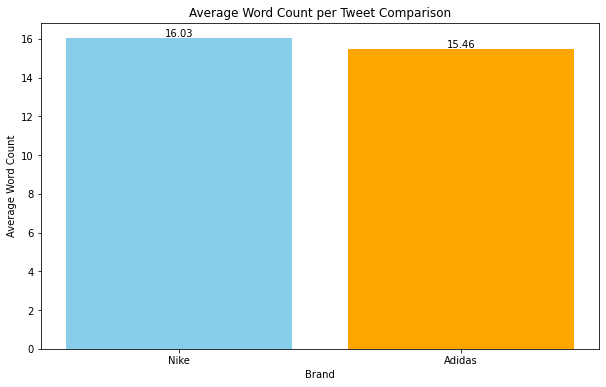

In [282]:
import matplotlib.pyplot as plt

# The brands and their respective average word counts
brands = ['Nike', 'Adidas']
avg_word_counts = [nike_avg_word_count, adidas_avg_word_count]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(brands, avg_word_counts, color=['skyblue', 'orange'])
plt.title('Average Word Count per Tweet Comparison')
plt.xlabel('Brand')
plt.ylabel('Average Word Count')

# Adding text labels to each bar
for bar, count in zip(bars, avg_word_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count:.2f}', ha='center', va='bottom')

plt.show()

In [283]:
# Extract unique user IDs for Nike and Adidas datasets
nike_unique_users = nike['author_id'].nunique()
adidas_unique_users = adidas['author_id'].nunique()

print("Number of unique users for Nike dataset:", nike_unique_users)
print("Number of unique users for Adidas dataset:", adidas_unique_users)

Number of unique users for Nike dataset: 1153
Number of unique users for Adidas dataset: 1706


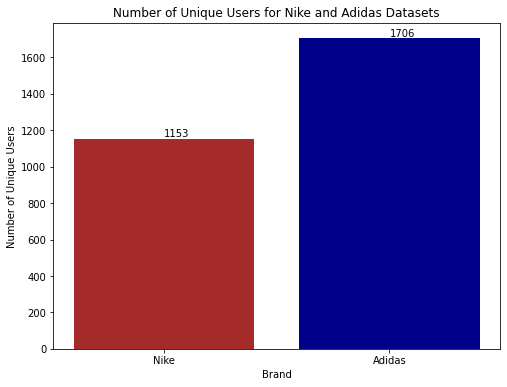

In [284]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(['Nike', 'Adidas'], [nike_unique_users, adidas_unique_users], color=['brown', 'darkblue'])
plt.xlabel('Brand')
plt.ylabel('Number of Unique Users')
plt.title('Number of Unique Users for Nike and Adidas Datasets')

# Adding numbers on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.show()


In [285]:
# Nike
nike_hashtags = nike['hashtags'].explode()
nike_top_hashtags = nike_hashtags.value_counts().head(5)

# Adidas
adidas_hashtags = adidas['hashtags'].explode()
adidas_top_hashtags = adidas_hashtags.value_counts().head(5)

print("Top Hashtags - Nike:")
print(nike_top_hashtags)
print("\nTop Hashtags - Adidas:")
print(adidas_top_hashtags)


Top Hashtags - Nike:
[{'text': 'poshmark', 'indices': [75, 84]}, {'text': 'fashion', 'indices': [85, 93]}, {'text': 'style', 'indices': [94, 100]}, {'text': 'shopmycloset', 'indices': [101, 114]}, {'text': 'nike', 'indices': [115, 120]}]                                                                                                             48
[{'text': 'poshmark', 'indices': [113, 122]}, {'text': 'fashion', 'indices': [123, 131]}, {'text': 'style', 'indices': [132, 138]}, {'text': 'shopmycloset', 'indices': [139, 152]}, {'text': 'agadrianogoldschmied', 'indices': [153, 174]}, {'text': 'adidas', 'indices': [175, 182]}, {'text': 'nike', 'indices': [183, 188]}]    23
[{'text': 'Nike', 'indices': [125, 130]}]                                                                                                                                                                                                                                                                                          

In [286]:
#Check the language distribustion for both brands
# Nike
nike_lang_distribution = nike['lang'].value_counts()

# Adidas
adidas_lang_distribution = adidas['lang'].value_counts()

print("Language Distribution - Nike:")
print(nike_lang_distribution)
print("\nLanguage Distribution - Adidas:")
print(adidas_lang_distribution)


Language Distribution - Nike:
en    3000
Name: lang, dtype: int64

Language Distribution - Adidas:
en    2805
Name: lang, dtype: int64


In [287]:
from collections import Counter
# Nike
nike_all_words = text_df['text'].str.split().sum()
nike_word_counts = Counter(nike_all_words)

# Adidas
adidas_all_words = text_df1['text'].str.split().sum()
adidas_word_counts = Counter(adidas_all_words)

print("Top Words - Nike:")
print(nike_word_counts.most_common(10))
print("\nTop Words - Adidas:")
print(adidas_word_counts.most_common(10))


Top Words - Nike:
[('nike', 3123), ('shoes', 1258), ('fashion', 1229), ('check', 1213), ('style', 1208), ('im', 1168), ('good', 1152), ('share', 1147), ('items', 1144), ('loving', 1143)]

Top Words - Adidas:
[('adidas', 3615), ('check', 1466), ('fashion', 1410), ('style', 1381), ('share', 1364), ('good', 1363), ('im', 1362), ('items', 1359), ('poshmark', 1354), ('shopmycloset', 1353)]


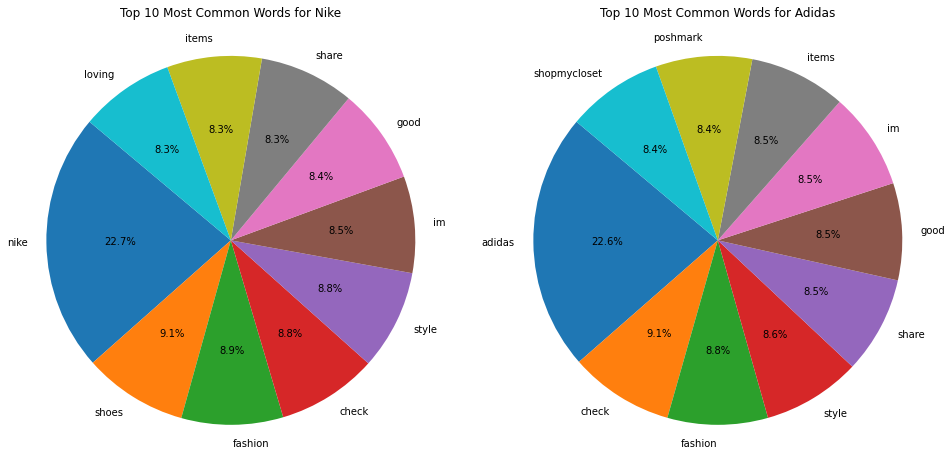

In [288]:
import matplotlib.pyplot as plt

# Top 10 most common words for Nike
nike_top_words = dict(nike_word_counts.most_common(10))

# Top 10 most common words for Adidas
adidas_top_words = dict(adidas_word_counts.most_common(10))

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plotting pie chart for Nike
axs[0].pie(nike_top_words.values(), labels=nike_top_words.keys(), autopct='%1.1f%%', startangle=140)
axs[0].set_title('Top 10 Most Common Words for Nike')
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plotting pie chart for Adidas
axs[1].pie(adidas_top_words.values(), labels=adidas_top_words.keys(), autopct='%1.1f%%', startangle=140)
axs[1].set_title('Top 10 Most Common Words for Adidas')
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


# Comparative Analysis of Tweet Activity Over Location: Nike vs. Adidas

In [289]:
import matplotlib.pyplot as plt

# Top 10 locations mentioned in Nike tweets:
nike_location_counts = nike['location'].value_counts()
print("Top 10 locations mentioned in Nike tweets:")
print(nike_location_counts.head(10))



Top 10 locations mentioned in Nike tweets:
636 11th Avenue, New York, NY     465
636 11th Avenue, New York, NY     113
 Philadelphia, PA 19142, USA       90
555 Madison Ave, New York, NY      89
United States                      87
London, England                    49
Space, CA                          32
New Jersey, USA                    24
California, USA                    23
Florida, USA                       19
Name: location, dtype: int64


In [290]:
# Top 10 locations mentioned in Adidas tweets:
adidas_location_counts = adidas['location'].value_counts()
print("\nTop 10 locations mentioned in Adidas tweets:")
print(adidas_location_counts.head(10))


Top 10 locations mentioned in Adidas tweets:
United States              78
Herzogenaurach, Germany    75
Wales, United Kingdom      69
España                     32
Bazingaar                  23
United Kingdom             20
UK                         19
Florida, USA               17
Hull, England              17
California, USA            17
Name: location, dtype: int64


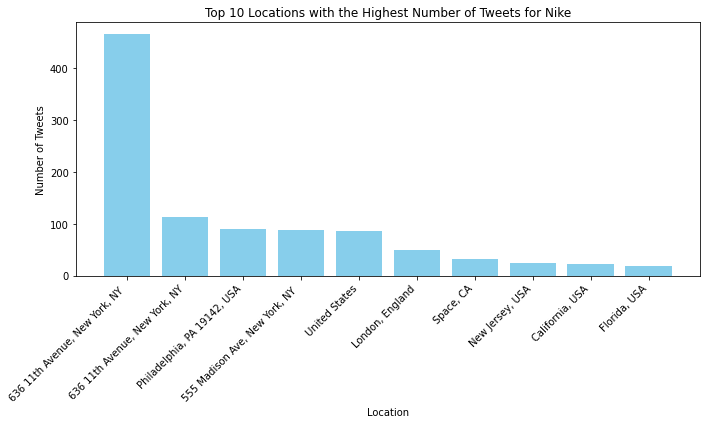

In [291]:
import matplotlib.pyplot as plt

# Count the number of tweets for each location
location_counts = nike['location'].value_counts().reset_index()

# Select top 10 locations
top_10_locations = location_counts.head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_locations['index'], top_10_locations['location'], color='skyblue')
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
plt.title('Top 10 Locations with the Highest Number of Tweets for Nike')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


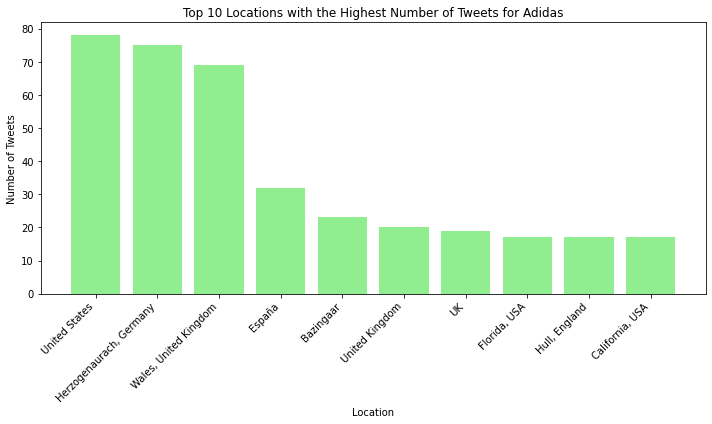

In [292]:
import matplotlib.pyplot as plt

# Count the number of tweets for each location
location_counts = adidas['location'].value_counts().reset_index()

# Select top 10 locations
top_10_locations = location_counts.head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_locations['index'], top_10_locations['location'], color='lightgreen')
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
plt.title('Top 10 Locations with the Highest Number of Tweets for Adidas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [293]:
# For Nike
# Find the country with the maximum tweets for Nike
max_country_tweets_nike = nike['location'].value_counts().idxmax()
max_country_tweet_count_nike = nike['location'].value_counts().max()

print(f"For Nike, the country with the maximum tweets is {max_country_tweets_nike} with {max_country_tweet_count_nike} tweets.")

# Find the user who tweeted the most for Nike
max_tweets_user_nike = nike['author_id'].value_counts().idxmax()
max_tweets_count_nike = nike['author_id'].value_counts().max()

print(f"For Nike, the user with the maximum tweets is {max_tweets_user_nike} with {max_tweets_count_nike} tweets.")



For Nike, the country with the maximum tweets is 636 11th Avenue, New York, NY  with 465 tweets.
For Nike, the user with the maximum tweets is 1.57e+18 with 379 tweets.


In [294]:
# For Adidas
# Find the country with the maximum tweets for Adidas
max_country_tweets_adidas = adidas['location'].value_counts().idxmax()
max_country_tweet_count_adidas = adidas['location'].value_counts().max()

print(f"For Adidas, the country with the maximum tweets is {max_country_tweets_adidas} with {max_country_tweet_count_adidas} tweets.")

# Find the user who tweeted the most for Adidas
max_tweets_user_adidas = adidas['author_id'].value_counts().idxmax()
max_tweets_count_adidas = adidas['author_id'].value_counts().max()

print(f"For Adidas, the user with the maximum tweets is {max_tweets_user_adidas} with {max_tweets_count_adidas} tweets.")


For Adidas, the country with the maximum tweets is United States with 78 tweets.
For Adidas, the user with the maximum tweets is 1495892640386191360 with 190 tweets.


In [295]:
# For Nike
nike_max_country = nike['location'].value_counts().idxmax()
nike_max_tweets = nike['location'].value_counts().max()

# For Adidas
adidas_max_country = adidas['location'].value_counts().idxmax()
adidas_max_tweets = adidas['location'].value_counts().max()

print("Country with maximum tweets for Nike:", nike_max_country)
print("Number of tweets from", nike_max_country, "for Nike:", nike_max_tweets)

print("Country with maximum tweets for Adidas:", adidas_max_country)
print("Number of tweets from", adidas_max_country, "for Adidas:", adidas_max_tweets)


Country with maximum tweets for Nike: 636 11th Avenue, New York, NY 
Number of tweets from 636 11th Avenue, New York, NY  for Nike: 465
Country with maximum tweets for Adidas: United States
Number of tweets from United States for Adidas: 78


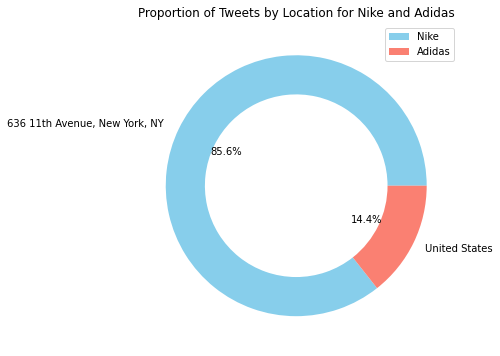

In [296]:
import matplotlib.pyplot as plt

# Data
countries = [nike_max_country, adidas_max_country]
tweets_count = [nike_max_tweets, adidas_max_tweets]

# Plot
plt.figure(figsize=(8, 6))
patches, texts, _ = plt.pie(tweets_count, labels=countries, autopct='%1.1f%%', colors=['skyblue', 'salmon'], wedgeprops=dict(width=0.3))
plt.title('Proportion of Tweets by Location for Nike and Adidas')

# Draw a white circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.2, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add legend
plt.legend(patches, ['Nike', 'Adidas'], loc="best")

plt.show()


# Sentiment Analysis (Nike vs. Adidas)

In [297]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [298]:
from textblob import TextBlob
text_df['polarity'] = text_df['text'].apply(polarity)

In [299]:
from textblob import TextBlob
text_df1['polarity'] = text_df['text'].apply(polarity)

In [300]:
text_df.head(6) #nike

author_id  statuses_count    location  verified  followers_count  \
0  1.630000e+18               2      Sweden     False                0   
1  1.270000e+18             387         NaN     False               39   
2  1.190000e+18             409         NaN     False               19   
3  1.400000e+18             393         NaN     False              177   
4  1.400000e+18             393         NaN     False              177   
5  1.420000e+18            1030  Denver, CO     False              265   

   friends_count  listed_count  favourites_count      tweet_id  \
0             14             0                 0  1.630000e+18   
1            120             0              1381  1.630000e+18   
2             23             0                22  1.630000e+18   
3            188             0               795  1.630000e+18   
4            188             0               795  1.630000e+18   
5            234             1                42  1.630000e+18   

                                                text        created_at lang  \
0                                     nike open sone  23/02/2023 23:59   en   
1  jordan year bhm bhmkotd nike jordan 23 jordan1...  23/02/2023 23:57   en   
2  nike dunk low teddy bear deadstock size 5w pri...  23/02/2023 23:56   en   
3  mapess face album complet mapess kaaris lacrim...  23/02/2023 23:54   en   
4  landy brave album complet landy kaaris lacrim ...  23/02/2023 23:54   en   
5  frank ocean performing nikes frankocean nikes ...  23/02/2023 23:45   en   

   retweet_count                                           hashtags  \
0              0              [{'text': 'Nike', 'indices': [0, 5]}]   
1              6  [{'text': 'BHM', 'indices': [13, 17]}, {'text'...   
2              0  [{'text': 'simplysneakers', 'indices': [56, 71...   
3              4  [{'text': 'Mapess', 'indices': [65, 72]}, {'te...   
4              4  [{'text': 'landy', 'indices': [63, 69]}, {'tex...   
5              0  [{'text': 'FrankOcean', 'indices': [34, 45]}, ...   

   favorite_count  polarity  
0               0       0.0  
1              31       0.0  
2               0       0.0  
3               5       0.0  
4               5       0.8  
5               2       0.0

In [301]:
text_df1.head(6) #adidas

author_id  statuses_count                  location  verified  \
0  1577322277531680771           18030                 Bazingaar     False   
1  1594365657663127552             126                       NaN     False   
2  1593071609983766528             820  United States of America     False   
3  1189667906977746944            2933                       NaN     False   
4  1254605184447242242             787                       NaN     False   
5           3236798096            5211                  arkansas     False   

   followers_count  friends_count  listed_count  favourites_count  \
0              276            572             1                 5   
1              393             62            11               324   
2                9             34             0               203   
3                7             26             0               870   
4               11              0             1                 0   
5             1146           1064            18                16   

              tweet_id                                               text  \
0  1628903997636595713  adidas mens tiro 21 track pants blackwhite med...   
1  1628903774940012546  made blender3d adidas adidas adidasoriginals a...   
2  1628900546756358146  good share check items im loving poshmarkapp s...   
3  1628900525210206208  good share check items im loving poshmarkapp p...   
4  1628900494201720832  good share check items im loving poshmarkapp g...   
5  1628900349825392640  good share check items im loving poshmarkapp b...   

            created_at lang  retweet_count  \
0  2023-02-23 23:45:51   en              1   
1  2023-02-23 23:44:58   en              0   
2  2023-02-23 23:32:08   en              0   
3  2023-02-23 23:32:03   en              0   
4  2023-02-23 23:31:55   en              0   
5  2023-02-23 23:31:21   en              0   

                                            hashtags  favorite_count  polarity  
0        [{'text': 'adidas', 'indices': [126, 133]}]               0       0.0  
1          [{'text': 'adidas', 'indices': [25, 32]}]               5       0.0  
2  [{'text': 'poshmark', 'indices': [97, 106]}, {...               0       0.0  
3  [{'text': 'poshmark', 'indices': [75, 84]}, {'...               0       0.0  
4  [{'text': 'poshmark', 'indices': [93, 102]}, {...               0       0.8  
5  [{'text': 'poshmark', 'indices': [113, 122]}, ...               0       0.0

In [302]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [303]:
#Nike
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [304]:
text_df.head(6)

author_id  statuses_count    location  verified  followers_count  \
0  1.630000e+18               2      Sweden     False                0   
1  1.270000e+18             387         NaN     False               39   
2  1.190000e+18             409         NaN     False               19   
3  1.400000e+18             393         NaN     False              177   
4  1.400000e+18             393         NaN     False              177   
5  1.420000e+18            1030  Denver, CO     False              265   

   friends_count  listed_count  favourites_count      tweet_id  \
0             14             0                 0  1.630000e+18   
1            120             0              1381  1.630000e+18   
2             23             0                22  1.630000e+18   
3            188             0               795  1.630000e+18   
4            188             0               795  1.630000e+18   
5            234             1                42  1.630000e+18   

                                                text        created_at lang  \
0                                     nike open sone  23/02/2023 23:59   en   
1  jordan year bhm bhmkotd nike jordan 23 jordan1...  23/02/2023 23:57   en   
2  nike dunk low teddy bear deadstock size 5w pri...  23/02/2023 23:56   en   
3  mapess face album complet mapess kaaris lacrim...  23/02/2023 23:54   en   
4  landy brave album complet landy kaaris lacrim ...  23/02/2023 23:54   en   
5  frank ocean performing nikes frankocean nikes ...  23/02/2023 23:45   en   

   retweet_count                                           hashtags  \
0              0              [{'text': 'Nike', 'indices': [0, 5]}]   
1              6  [{'text': 'BHM', 'indices': [13, 17]}, {'text'...   
2              0  [{'text': 'simplysneakers', 'indices': [56, 71...   
3              4  [{'text': 'Mapess', 'indices': [65, 72]}, {'te...   
4              4  [{'text': 'landy', 'indices': [63, 69]}, {'tex...   
5              0  [{'text': 'FrankOcean', 'indices': [34, 45]}, ...   

   favorite_count  polarity sentiment  
0               0       0.0   Neutral  
1              31       0.0   Neutral  
2               0       0.0   Neutral  
3               5       0.0   Neutral  
4               5       0.8  Positive  
5               2       0.0   Neutral

In [305]:
#Adidas
text_df1['sentiment'] = text_df['polarity'].apply(sentiment)

In [306]:
text_df1.head(6)

author_id  statuses_count                  location  verified  \
0  1577322277531680771           18030                 Bazingaar     False   
1  1594365657663127552             126                       NaN     False   
2  1593071609983766528             820  United States of America     False   
3  1189667906977746944            2933                       NaN     False   
4  1254605184447242242             787                       NaN     False   
5           3236798096            5211                  arkansas     False   

   followers_count  friends_count  listed_count  favourites_count  \
0              276            572             1                 5   
1              393             62            11               324   
2                9             34             0               203   
3                7             26             0               870   
4               11              0             1                 0   
5             1146           1064            18                16   

              tweet_id                                               text  \
0  1628903997636595713  adidas mens tiro 21 track pants blackwhite med...   
1  1628903774940012546  made blender3d adidas adidas adidasoriginals a...   
2  1628900546756358146  good share check items im loving poshmarkapp s...   
3  1628900525210206208  good share check items im loving poshmarkapp p...   
4  1628900494201720832  good share check items im loving poshmarkapp g...   
5  1628900349825392640  good share check items im loving poshmarkapp b...   

            created_at lang  retweet_count  \
0  2023-02-23 23:45:51   en              1   
1  2023-02-23 23:44:58   en              0   
2  2023-02-23 23:32:08   en              0   
3  2023-02-23 23:32:03   en              0   
4  2023-02-23 23:31:55   en              0   
5  2023-02-23 23:31:21   en              0   

                                            hashtags  favorite_count  \
0        [{'text': 'adidas', 'indices': [126, 133]}]               0   
1          [{'text': 'adidas', 'indices': [25, 32]}]               5   
2  [{'text': 'poshmark', 'indices': [97, 106]}, {...               0   
3  [{'text': 'poshmark', 'indices': [75, 84]}, {'...               0   
4  [{'text': 'poshmark', 'indices': [93, 102]}, {...               0   
5  [{'text': 'poshmark', 'indices': [113, 122]}, ...               0   

   polarity sentiment  
0       0.0   Neutral  
1       0.0   Neutral  
2       0.0   Neutral  
3       0.0   Neutral  
4       0.8  Positive  
5       0.0   Neutral

In [307]:
text_df['sentiment'].value_counts()

Positive    1578
Neutral     1069
Negative     129
Name: sentiment, dtype: int64

In [308]:
text_df1['sentiment'].value_counts()

Positive    1454
Neutral     1012
Negative     123
Name: sentiment, dtype: int64

In [309]:
#NIKE
bar_chart = text_df['sentiment'].value_counts().rename_axis('sentiment').to_frame('Total Tweets').reset_index()
bar_chart # Display dataframe

sentiment  Total Tweets
0  Positive          1578
1   Neutral          1069
2  Negative           129

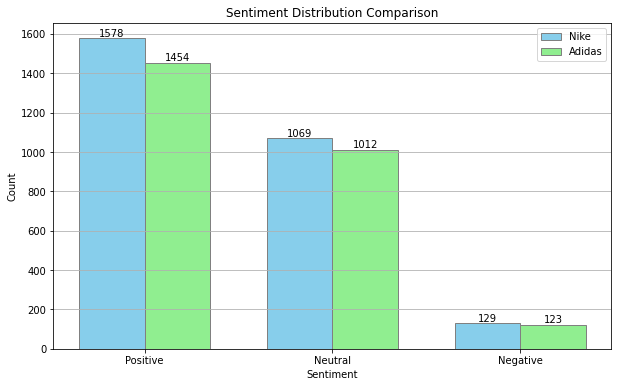

In [310]:
import matplotlib.pyplot as plt
import numpy as np

# Sentiment categories
sentiments = ['Positive', 'Neutral', 'Negative']

# Counts for text_df
counts_text_df = text_df['sentiment'].value_counts().reindex(sentiments, fill_value=0)

# Counts for text_df1
counts_text_df1 = text_df1['sentiment'].value_counts().reindex(sentiments, fill_value=0)

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(sentiments))
r2 = [x + bar_width for x in r1]

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(r1, counts_text_df, color='skyblue', width=bar_width, edgecolor='grey', label='Nike')
plt.bar(r2, counts_text_df1, color='lightgreen', width=bar_width, edgecolor='grey', label='Adidas')

# Add counts on top of the bars
for i, count in enumerate(counts_text_df):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

for i, count in enumerate(counts_text_df1):
    plt.text(i + bar_width, count, str(count), ha='center', va='bottom', fontsize=10)

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([r + bar_width/2 for r in range(len(sentiments))], sentiments)
plt.title('Sentiment Distribution Comparison')
plt.legend()
plt.grid(axis='y')
plt.show()


In [311]:
# Sort the Nike dataset by sentiment score in descending order
nike_sorted = text_df.sort_values(by='polarity', ascending=False)

# Get the top tweet and its sentiment
top_tweet = nike_sorted.iloc[0]['text']
top_sentiment = nike_sorted.iloc[0]['sentiment']

# Display the top tweet and its sentiment
print("Top Tweet:")
print(top_tweet)
print("\nSentiment:", top_sentiment)


Top Tweet:
best nike drops march 2023 heres youve got look forward swoosh month see thedropdate nike marchdrops ad

Sentiment: Positive


In [312]:
# Sort the nike dataset by sentiment score in descending order
nike_sorted = text_df.sort_values(by='polarity', ascending=False)

# Get the top 5 tweets and their sentiment
top_5_tweets = nike_sorted[['text', 'sentiment']].head(5)

# Display the top 5 tweets and their sentiment
print("Top 5 Tweets and Their Sentiment:")
print(top_5_tweets)


Top 5 Tweets and Their Sentiment:
                                                   text sentiment
2861  best nike drops march 2023 heres youve got loo...  Positive
131            nke vs skx best stock add portfolio nike  Positive
1935  air starring mattdamon benaffleck follows hist...  Positive
722   thought races mind wanted one thing body wante...  Positive
1263  god timing always perfect karolg pussinboots n...  Positive


In [313]:
#ADIDAS
bar_chart = text_df1['sentiment'].value_counts().rename_axis('sentiment').to_frame('Total Tweets').reset_index()
bar_chart # Display dataframe

sentiment  Total Tweets
0  Positive          1454
1   Neutral          1012
2  Negative           123

In [314]:
# Sort the Nike dataset by sentiment score in descending order
adidas_sorted = text_df1.sort_values(by='polarity', ascending=False)

# Get the top tweet and its sentiment
top_tweet = adidas_sorted.iloc[0]['text']
top_sentiment = adidas_sorted.iloc[0]['sentiment']

# Display the top tweet and its sentiment
print("Top Tweet:")
print(top_tweet)
print("\nSentiment:", top_sentiment)


Top Tweet:
shop adidas yeezy foam rnnr sand stockx goat ebay stadium goods flight club sneakerheads hype hypebeast adidas yeezy yeezyfoamrunner

Sentiment: Positive


In [315]:
# Sort the nike dataset by sentiment score in descending order
adidas_sorted = text_df1.sort_values(by='polarity', ascending=False)

# Get the top 5 tweets and their sentiment
top_5_tweets = adidas_sorted[['text', 'sentiment']].head(5)

# Display the top 5 tweets and their sentiment
print("Top 5 Tweets and Their Sentiment:")
print(top_5_tweets)


Top 5 Tweets and Their Sentiment:
                                                   text sentiment
1263  shop adidas yeezy foam rnnr sand stockx goat e...  Positive
350   adidas originals metaverse phase 2 sold 024 et...  Positive
131   praateeek shlfsply soumyapadhy hoisthisguy bt9...  Positive
802   adidas originals metaverse phase 2 sold 026 et...  Positive
722   good share check items im loving poshmarkapp p...  Positive


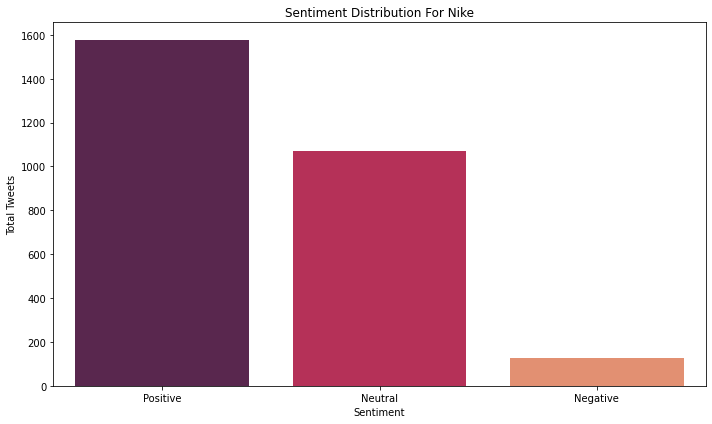

In [316]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
sentiment_counts = text_df['sentiment'].value_counts().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_counts, x='index', y='sentiment', palette='rocket')
plt.xlabel('Sentiment')
plt.ylabel('Total Tweets')
plt.title('Sentiment Distribution For Nike')
plt.tight_layout()
plt.show()


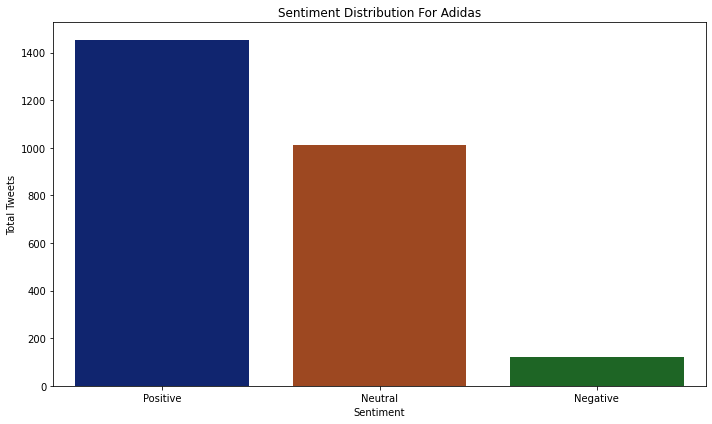

In [317]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
sentiment_counts = text_df1['sentiment'].value_counts().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_counts, x='index', y='sentiment', palette='dark')
plt.xlabel('Sentiment')
plt.ylabel('Total Tweets')
plt.title('Sentiment Distribution For Adidas')
plt.tight_layout()
plt.show()


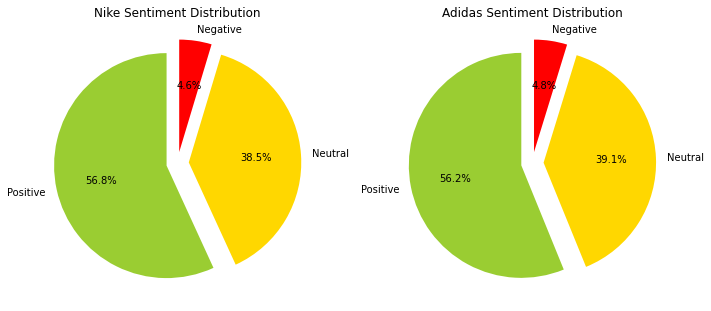

In [318]:
import matplotlib.pyplot as plt

# Nike sentiment distribution
nike_sentiment_counts = text_df['sentiment'].value_counts()
colors = ("yellowgreen", "gold", "red")
explode = (0.1, 0.1, 0.1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(nike_sentiment_counts, labels=nike_sentiment_counts.index, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode)
plt.title('Nike Sentiment Distribution')

# Adidas sentiment distribution
adidas_sentiment_counts = text_df1['sentiment'].value_counts()

plt.subplot(1, 2, 2)
plt.pie(adidas_sentiment_counts, labels=adidas_sentiment_counts.index, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode)
plt.title('Adidas Sentiment Distribution')

plt.tight_layout()
plt.show()


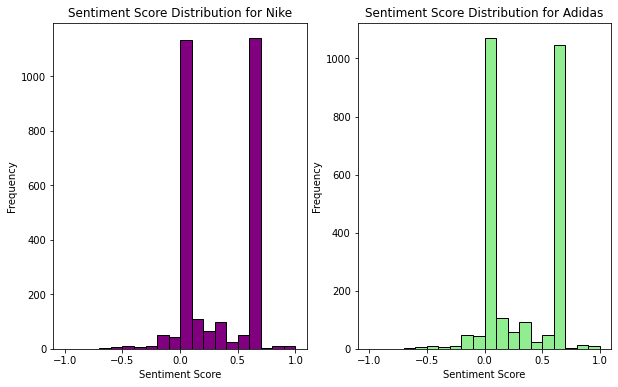

In [319]:
# Plot histogram for sentiment scores of Nike
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(text_df['polarity'], bins=20, color='purple', edgecolor='black')
plt.title('Sentiment Score Distribution for Nike')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Plot histogram for sentiment scores of Adidas
plt.subplot(1, 2, 2)
plt.hist(text_df1['polarity'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Sentiment Score Distribution for Adidas')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.show()


# Keyword Analysis:Nike

In [320]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

author_id  statuses_count                        location  verified  \
722   2.892144e+09            5397          The Library or the Gym     False   
1935  3.005796e+07            4211  Arizona, Nevada and California     False   
370   7.700000e+17            1812                               🤘     False   
1263  1.610000e+18              23                             NaN     False   
350   2.214084e+08            1224                      Bangladesh     False   

      followers_count  friends_count  listed_count  favourites_count  \
722              2746            468            12              7883   
1935             3647            122            65               745   
370                34            326             2              3462   
1263                0             30             0                 5   
350              1137           4466             4              3516   

          tweet_id                                               text  \
722   1.630000e+18  thought races mind wanted one thing body wante...   
1935  1.630000e+18  air starring mattdamon benaffleck follows hist...   
370   1.630000e+18                              hubby gifts best nike   
1263  1.630000e+18  god timing always perfect karolg pussinboots n...   
350   1.630000e+18  hi lets check perfect delivery moonbin theweek...   

            created_at lang  retweet_count  \
722   23/02/2023 13:56   en              1   
1935  25/02/2023 21:00   en              0   
370   23/02/2023 17:39   en              0   
1263  26/02/2023 17:39   en              0   
350   23/02/2023 18:09   en              1   

                                               hashtags  favorite_count  \
722   [{'text': 'books', 'indices': [237, 243]}, {'t...               6   
1935  [{'text': 'Air', 'indices': [0, 4]}, {'text': ...               3   
370             [{'text': 'nike', 'indices': [30, 35]}]               0   
1263  [{'text': 'KarolG', 'indices': [29, 36]}, {'te...               2   
350   [{'text': 'MOONBIN', 'indices': [37, 45]}, {'t...               0   

      polarity sentiment  
722        1.0  Positive  
1935       1.0  Positive  
370        1.0  Positive  
1263       1.0  Positive  
350        1.0  Positive

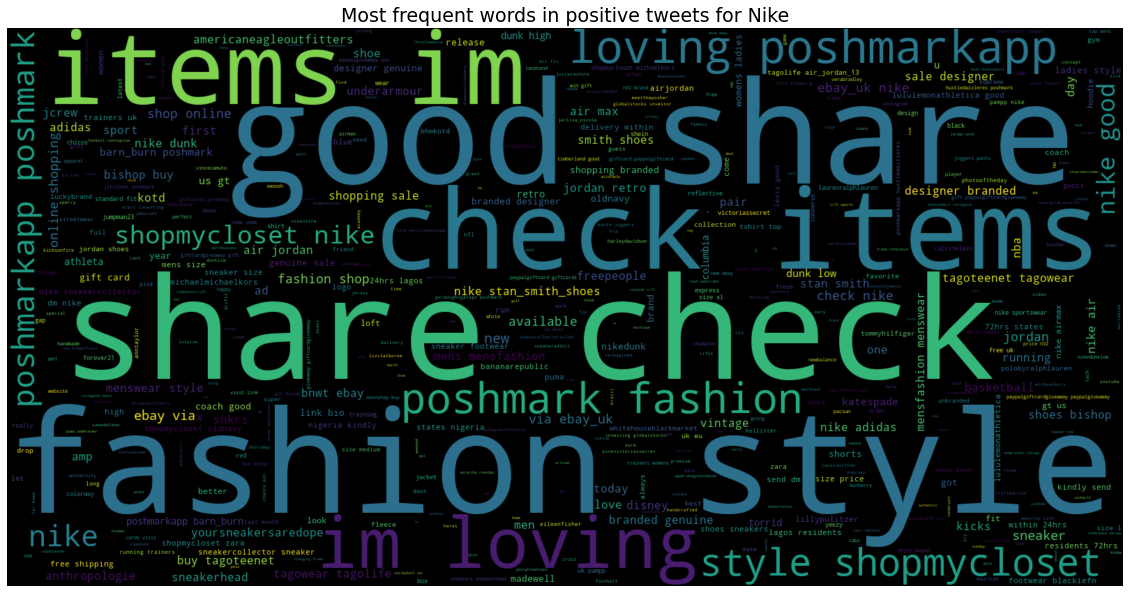

In [321]:
from wordcloud import WordCloud
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets for Nike', fontsize=19)
plt.show()

In [322]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

author_id  statuses_count        location  verified  followers_count  \
1167  1.490000e+18             622             NaN     False                0   
1937  9.440000e+17            1844     Waldorf, MD     False              691   
864   1.370000e+18              51     Cusseta, GA     False               47   
2557  3.379492e+08           46330  United Kingdom     False            63017   
1557  3.376552e+08           10821    South Africa     False            47585   

      friends_count  listed_count  favourites_count      tweet_id  \
1167              6             0                 4  1.630000e+18   
1937           1171             4              2756  1.630000e+18   
864             268             0               104  1.630000e+18   
2557            877           294              4670  1.631320e+18   
1557            444            34              9235  1.630000e+18   

                                                   text        created_at  \
1167  check nike dunk low retro red panda black whit...  26/02/2023 19:46   
1937  new nike jogger set arrived boys playoff run g...  25/02/2023 20:42   
864   game day whos ready chattahoochee county high ...  23/02/2023 12:12   
2557  nike air jordan 1 high og skyline brings littl...  02/03/2023 16:06   
1557  nike court vision low next nature canvas upper...  26/02/2023 08:00   

     lang  retweet_count                                           hashtags  \
1167   en              1  [{'text': 'eBay', 'indices': [102, 107]}, {'te...   
1937   en              1  [{'text': 'LargoBasketball', 'indices': [90, 1...   
864    en              0  [{'text': 'soccer', 'indices': [62, 69]}, {'te...   
2557   en              3  [{'text': 'thedropdate', 'indices': [135, 147]...   
1557   en              4  [{'text': 'styleonthemove', 'indices': [241, 2...   

      favorite_count  polarity sentiment  
1167               0 -0.006061  Negative  
1937               6 -0.006818  Negative  
864                2 -0.013333  Negative  
2557               4 -0.013750  Negative  
1557              17 -0.021429  Negative

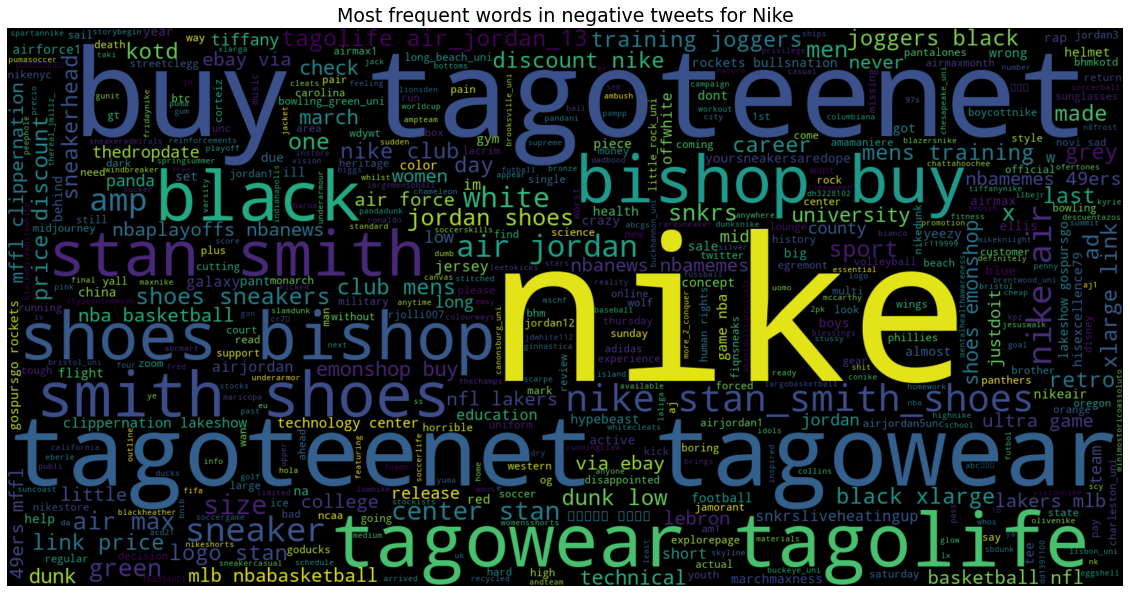

In [323]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets for Nike', fontsize=19)
plt.show()

In [324]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

author_id  statuses_count                        location  verified  \
0     1.630000e+18               2                          Sweden     False   
2153  1.565630e+18            1454  636 11th Avenue, New York, NY      False   
2135  1.571360e+18            1225   636 11th Avenue, New York, NY     False   
2136  1.565630e+18            1454  636 11th Avenue, New York, NY      False   
2137  1.565630e+18            1454  636 11th Avenue, New York, NY      False   

      followers_count  friends_count  listed_count  favourites_count  \
0                   0             14             0                 0   
2153                6              8             0                 3   
2135                3              5             0                 1   
2136                6              8             0                 3   
2137                6              8             0                 3   

          tweet_id                                               text  \
0     1.630000e+18                                     nike open sone   
2153  1.631410e+18  dongguk university los angeles air jordan 13 s...   
2135  1.631410e+18  arkansas baptist college air jordan 13 shoes e...   
2136  1.631410e+18  chapman university air jordan 13 shoes emonsho...   
2137  1.631410e+18  fashion institute design amp merchandising los...   

            created_at lang  retweet_count  \
0     23/02/2023 23:59   en              0   
2153  02/03/2023 21:40   en              0   
2135  02/03/2023 22:00   en              0   
2136  02/03/2023 22:00   en              0   
2137  02/03/2023 21:56   en              0   

                                               hashtags  favorite_count  \
0                 [{'text': 'Nike', 'indices': [0, 5]}]               0   
2153  [{'text': 'tagoteenet', 'indices': [117, 128]}...               0   
2135  [{'text': 'tagoteenet', 'indices': [111, 122]}...               0   
2136  [{'text': 'tagoteenet', 'indices': [105, 116]}...               0   
2137  [{'text': 'tagoteenet', 'indices': [146, 157]}...               0   

      polarity sentiment  
0          0.0   Neutral  
2153       0.0   Neutral  
2135       0.0   Neutral  
2136       0.0   Neutral  
2137       0.0   Neutral

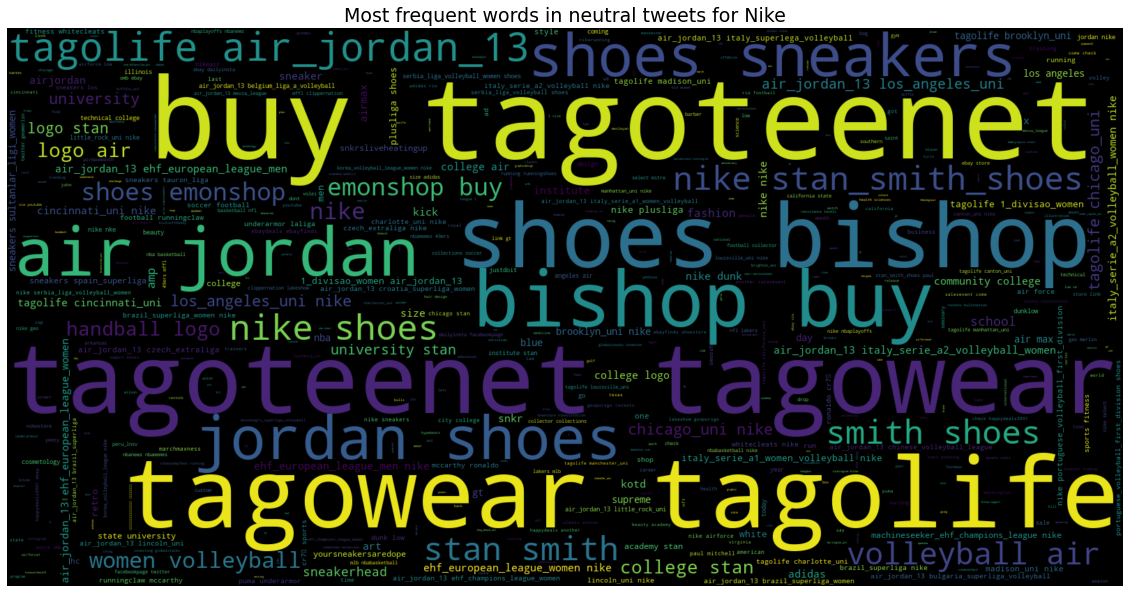

In [325]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets for Nike', fontsize=19)
plt.show()

# Keyword Analysis:Adidas

In [326]:
pos_tweets = text_df1[text_df1.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

author_id  statuses_count              location  verified  \
131             921965882          197046         United States     False   
1263  1061473353494609920            4987                   NaN     False   
350   1495892640386191360           12525                   NaN     False   
2376           3152067589            1539  Hawthorne, NewJersey     False   
370   1141161590089060352            1175                   NaN     False   

      followers_count  friends_count  listed_count  favourites_count  \
131              3205           1400            60            188123   
1263              141             41             0                11   
350                67             71             0               115   
2376               33            276             0              2423   
370                22             36             0                 0   

                 tweet_id                                               text  \
131   1628808962115006465  praateeek shlfsply soumyapadhy hoisthisguy bt9...   
1263  1629695519348891648  shop adidas yeezy foam rnnr sand stockx goat e...   
350   1628623644636200962  adidas originals metaverse phase 2 sold 024 et...   
2376  1630999174098583554  good share check items im loving poshmarkapp p...   
370   1628613219718950913  good share check items im loving poshmarkapp b...   

               created_at lang  retweet_count  \
131   2023-02-23 17:28:13   en              1   
1263  2023-02-26 04:11:04   en              2   
350   2023-02-23 05:11:49   en              0   
2376  2023-03-01 18:31:20   en              0   
370   2023-02-23 04:30:24   en              0   

                                               hashtags  favorite_count  \
131   [{'text': 'NFT', 'indices': [237, 241]}, {'tex...               2   
1263  [{'text': 'sneakerheads', 'indices': [200, 213...               0   
350   [{'text': 'adidas', 'indices': [200, 207]}, {'...               0   
2376  [{'text': 'poshmark', 'indices': [75, 84]}, {'...               0   
370   [{'text': 'poshmark', 'indices': [113, 122]}, ...               0   

      polarity sentiment  
131        1.0  Positive  
1263       1.0  Positive  
350        1.0  Positive  
2376       1.0  Positive  
370        1.0  Positive

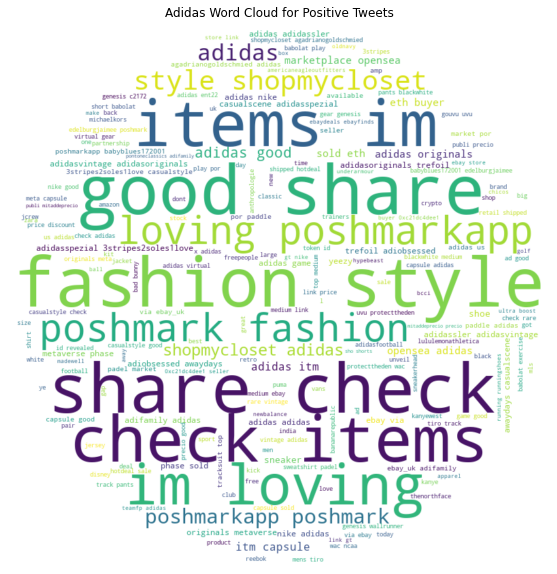

In [327]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Assuming you have already defined pos_tweets
text = ' '.join([word for word in pos_tweets['text']])

# Generate a circular mask
x, y = np.ogrid[:800, :800]
mask = (x - 400) ** 2 + (y - 400) ** 2 > 400 ** 2
circle_mask = 255 * mask.astype(int)

# Generate word cloud with circular mask
wordcloud = WordCloud(mask=circle_mask, contour_color='white', contour_width=2,
                      background_color='white', colormap='viridis', max_words=200).generate_from_text(text)

# Plot word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Adidas Word Cloud for Positive Tweets')
plt.show()


In [328]:
neg_tweets = text_df1[text_df1.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

author_id  statuses_count         location  verified  \
1167   700411533700919296            6222              NaN     False   
1937             23561319            5139     Vancouver BC     False   
864   1101274547850948608             532  California, USA     False   
2557  1495892640386191360           12525              NaN     False   
1557  1619379689553788930             333           España     False   

      followers_count  friends_count  listed_count  favourites_count  \
1167               38            177             1               933   
1937               30             85             0                30   
864               109             12             0                 0   
2557               67             71             0               115   
1557               93            220             0                76   

                 tweet_id                                               text  \
1167  1629806365353934849  good share check items im loving poshmarkapp c...   
1937  1631331775560466433  good share check items im loving poshmarkapp p...   
864   1628205443217760257  good share check items im loving poshmarkapp p...   
2557  1630875939826442246  adidas originals meta capsule sold 0053 eth 87...   
1557  1629454538062147585  adidas gt6637 sq21 sw hood sweatshirt mens whi...   

               created_at lang  retweet_count  \
1167  2023-02-26 11:31:32   en              0   
1937  2023-03-02 16:32:58   en              0   
864   2023-02-22 01:30:02   en              0   
2557  2023-03-01 10:21:38   en              0   
1557  2023-02-25 12:13:30   en              0   

                                               hashtags  favorite_count  \
1167  [{'text': 'poshmark', 'indices': [92, 101]}, {...               0   
1937  [{'text': 'poshmark', 'indices': [75, 84]}, {'...               0   
864   [{'text': 'poshmark', 'indices': [75, 84]}, {'...               0   
2557  [{'text': 'adidas', 'indices': [183, 190]}, {'...               0   
1557  [{'text': 'Sudadera', 'indices': [56, 65]}, {'...               0   

      polarity sentiment  
1167 -0.006061  Negative  
1937 -0.006818  Negative  
864  -0.013333  Negative  
2557 -0.013750  Negative  
1557 -0.021429  Negative

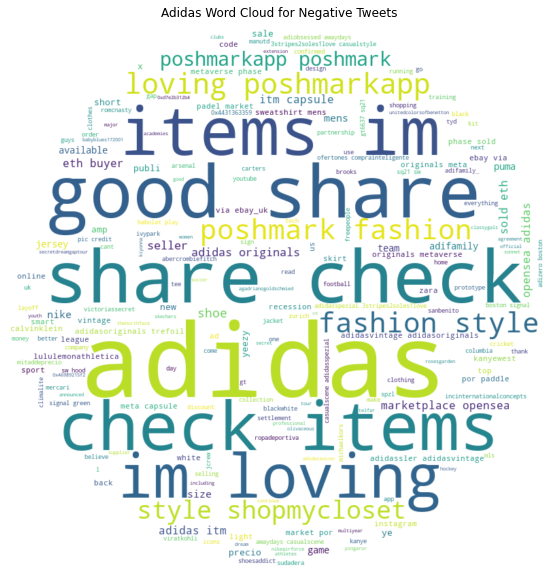

In [329]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Assuming you have already defined neg_tweets
text = ' '.join([word for word in neg_tweets['text']])

# Generate a circular mask
x, y = np.ogrid[:800, :800]
mask = (x - 400) ** 2 + (y - 400) ** 2 > 400 ** 2
circle_mask = 255 * mask.astype(int)

# Generate word cloud with circular mask
wordcloud = WordCloud(mask=circle_mask, contour_color='white', contour_width=2,
                      background_color='white', colormap='viridis', max_words=200).generate_from_text(text)

# Plot word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Adidas Word Cloud for Negative Tweets')
plt.show()


In [330]:
neutral_tweets = text_df1[text_df1.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

author_id  statuses_count                        location  \
0     1577322277531680771           18030                       Bazingaar   
2099  1299302958421737475          393805                             NaN   
2054            143245156           75259  Remscheid, Nordrhein-Westfalen   
2055  1619379689553788930             333                          España   
2056  1619379689553788930             333                          España   

      verified  followers_count  friends_count  listed_count  \
0        False              276            572             1   
2099     False              255            192             3   
2054      True             6683           1220           225   
2055     False               93            220             0   
2056     False               93            220             0   

      favourites_count             tweet_id  \
0                    5  1628903997636595713   
2099               536  1631187984748802050   
2054               274  1631236121584607235   
2055                76  1631236101611442177   
2056                76  1631236036301930497   

                                                   text           created_at  \
0     adidas mens tiro 21 track pants blackwhite med...  2023-02-23 23:45:51   
2099  bullpadel bpm22008 next backpack padel market ...  2023-03-02 07:01:36   
2054  adidas presents latest juventusfc icons collec...  2023-03-02 10:12:52   
2055  adidas sq21 dt sho shorts unisex kids team nav...  2023-03-02 10:12:48   
2056  adidas made training logo graphic pacer pantal...  2023-03-02 10:12:32   

     lang  retweet_count                                           hashtags  \
0      en              1        [{'text': 'adidas', 'indices': [126, 133]}]   
2099   en              0  [{'text': 'adidas', 'indices': [86, 93]}, {'te...   
2054   en              0  [{'text': 'adidas', 'indices': [0, 7]}, {'text...   
2055   en              0  [{'text': 'Shorts', 'indices': [73, 80]}, {'te...   
2056   en              0  [{'text': 'Shorts', 'indices': [92, 99]}, {'te...   

      favorite_count  polarity sentiment  
0                  0       0.0   Neutral  
2099               0       0.0   Neutral  
2054               0       0.0   Neutral  
2055               0       0.0   Neutral  
2056               0       0.0   Neutral

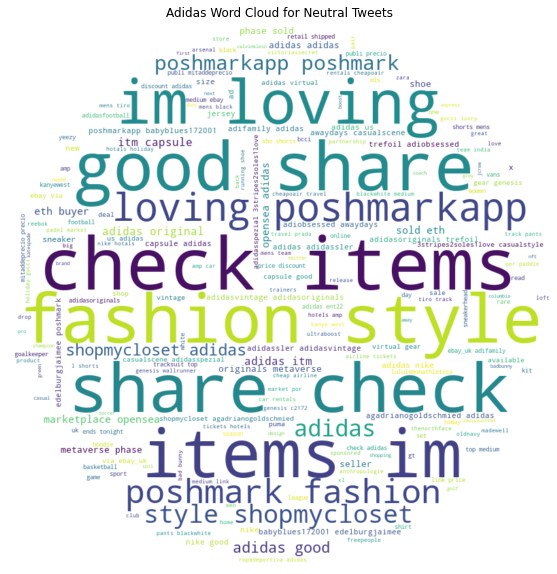

In [331]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Assuming you have already defined neutral_tweets
text = ' '.join([word for word in neutral_tweets['text']])

# Generate a circular mask
x, y = np.ogrid[:800, :800]
mask = (x - 400) ** 2 + (y - 400) ** 2 > 400 ** 2
circle_mask = 255 * mask.astype(int)

# Generate word cloud with circular mask
wordcloud = WordCloud(mask=circle_mask, contour_color='white', contour_width=2,
                      background_color='white', colormap='viridis', max_words=200).generate_from_text(text)

# Plot word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Adidas Word Cloud for Neutral Tweets')
plt.show()


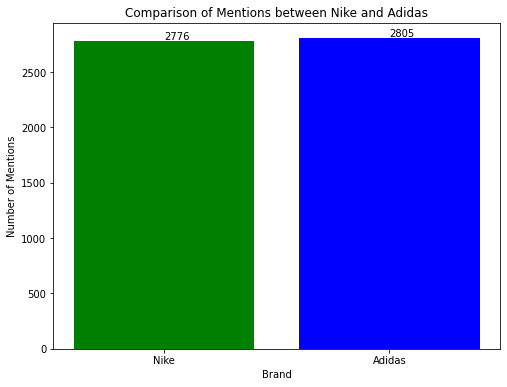

In [332]:
import matplotlib.pyplot as plt

# Number of mentions for Nike and Adidas
nike_mentions_count = len(text_df[text_df['text'].str.contains('Nike', case=False)])
adidas_mentions_count = len(text_df1[text_df1['text'].str.contains('Adidas', case=False)])

# Create labels and counts for the bar plot
brands = ['Nike', 'Adidas']
mentions_counts = [nike_mentions_count, adidas_mentions_count]

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(brands, mentions_counts, color=['green', 'blue'])
plt.xlabel('Brand')
plt.ylabel('Number of Mentions')
plt.title('Comparison of Mentions between Nike and Adidas')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.show()


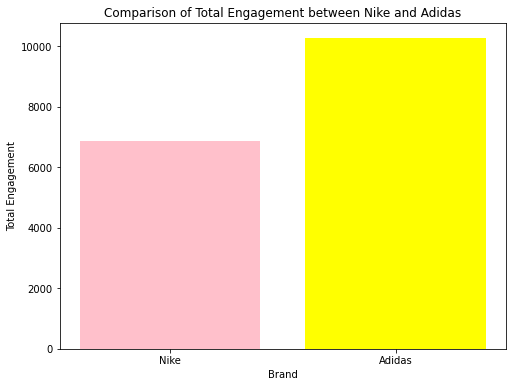

In [333]:
import matplotlib.pyplot as plt

# Calculate total engagement for Nike
nike_total_engagement = nike['retweet_count'].sum() + nike['favorite_count'].sum()

# Calculate total engagement for Adidas
adidas_total_engagement = adidas['retweet_count'].sum() + adidas['favorite_count'].sum()

# Create labels and counts for the bar plot
brands = ['Nike', 'Adidas']
total_engagements = [nike_total_engagement, adidas_total_engagement]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(brands, total_engagements, color=['pink', 'yellow'])
plt.xlabel('Brand')
plt.ylabel('Total Engagement')
plt.title('Comparison of Total Engagement between Nike and Adidas')
plt.show()


In [334]:
from collections import Counter
import matplotlib.pyplot as plt

# Tokenize the text and count word frequencies for Nike
nike_all_words = ' '.join(text_df['text']).split()
nike_word_freq = Counter(nike_all_words)

# Tokenize the text and count word frequencies for Adidas
adidas_all_words = ' '.join(text_df1['text']).split()
adidas_word_freq = Counter(adidas_all_words)

# Get the top 5 most common words for Nike
nike_top_words = dict(nike_word_freq.most_common(5))

# Get the top 5 most common words for Adidas
adidas_top_words = dict(adidas_word_freq.most_common(5))




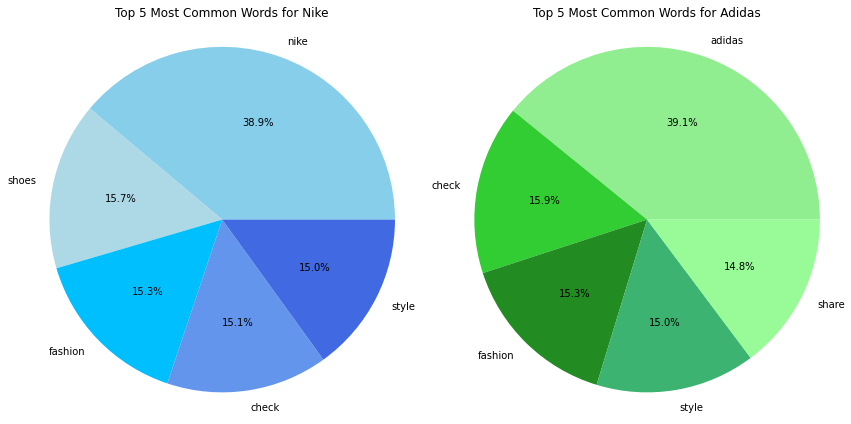

In [335]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting a pie chart for Nike
axes[0].pie(nike_top_words.values(), labels=nike_top_words.keys(), autopct='%1.1f%%', colors=['skyblue', 'lightblue', 'deepskyblue', 'cornflowerblue', 'royalblue'])
axes[0].set_title('Top 5 Most Common Words for Nike')

# Plotting a pie chart for Adidas
axes[1].pie(adidas_top_words.values(), labels=adidas_top_words.keys(), autopct='%1.1f%%', colors=['lightgreen', 'limegreen', 'forestgreen', 'mediumseagreen', 'palegreen'])
axes[1].set_title('Top 5 Most Common Words for Adidas')

# Equal aspect ratio ensures that pie is drawn as a circle
axes[0].axis('equal')
axes[1].axis('equal')

# Display the plot
plt.tight_layout()
plt.show()


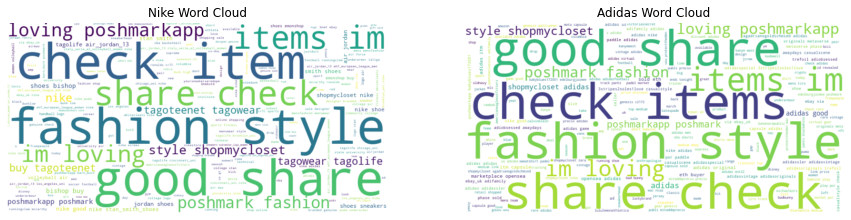

In [336]:
from wordcloud import WordCloud

# Concatenate all tweets for Nike and Adidas
nike_text = ' '.join(text_df['text'])
adidas_text = ' '.join(text_df1['text'])

# Generate word clouds
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
nike_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(nike_text)
plt.imshow(nike_wordcloud, interpolation='bilinear')
plt.title('Nike Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
adidas_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(adidas_text)
plt.imshow(adidas_wordcloud, interpolation='bilinear')
plt.title('Adidas Word Cloud')
plt.axis('off')

plt.show()


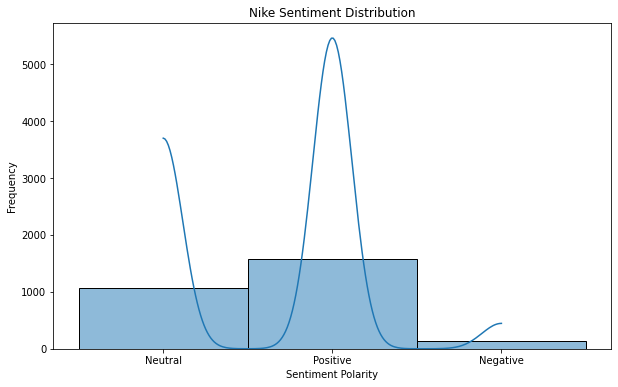

In [337]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(text_df['sentiment'], bins=30, kde=True)
plt.title('Nike Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

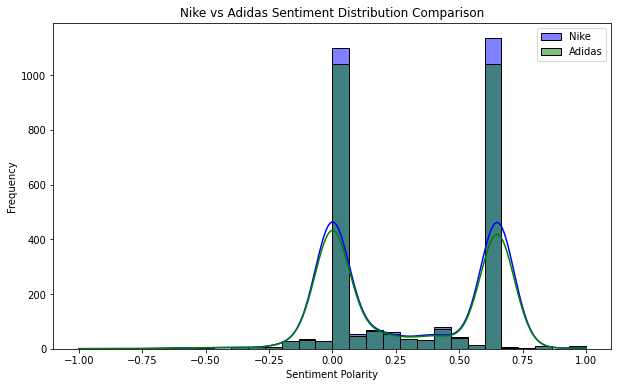

In [338]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plotting sentiment distribution for Nike
sns.histplot(text_df['polarity'], bins=30, kde=True, color='blue', label='Nike')

# Plotting sentiment distribution for Adidas
sns.histplot(text_df1['polarity'], bins=30, kde=True, color='green', label='Adidas')

# Set labels and title
plt.title('Nike vs Adidas Sentiment Distribution Comparison')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Display the plot
plt.show()


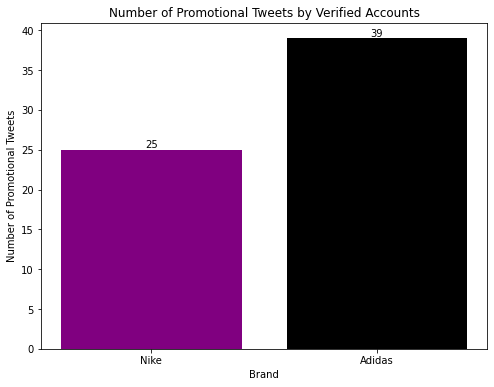

In [339]:
import matplotlib.pyplot as plt

# Filter promotional tweets for Nike
nike_promotional_tweets = nike[nike['verified'] == True]

# Filter promotional tweets for Adidas
adidas_promotional_tweets = adidas[adidas['verified'] == True]

# Number of promotional tweets for Nike
num_nike_promotional_tweets = nike_promotional_tweets.shape[0]

# Number of promotional tweets for Adidas
num_adidas_promotional_tweets = adidas_promotional_tweets.shape[0]

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(['Nike', 'Adidas'], [num_nike_promotional_tweets, num_adidas_promotional_tweets], color=['purple', 'black'])

# Adding count annotations to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, '%d' % int(height), ha='center', va='bottom')

plt.title('Number of Promotional Tweets by Verified Accounts')
plt.xlabel('Brand')
plt.ylabel('Number of Promotional Tweets')
plt.show()


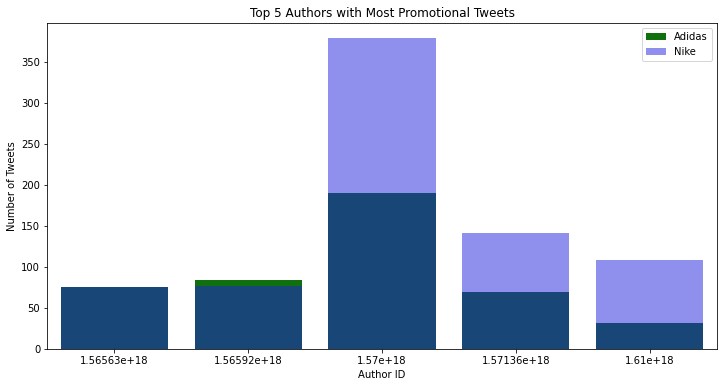

In [340]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group promotional tweets by author ID and count the number of tweets per author for Adidas
adidas_promotional_tweets_count = adidas.groupby('author_id').size().reset_index(name='num_tweets')

# Sort promotional tweets based on the number of tweets per author in descending order for Adidas
sorted_adidas_promotional_tweets = adidas_promotional_tweets_count.sort_values(by='num_tweets', ascending=False)

# Group promotional tweets by author ID and count the number of tweets per author for Nike
nike_promotional_tweets_count = nike.groupby('author_id').size().reset_index(name='num_tweets')

# Sort promotional tweets based on the number of tweets per author in descending order for Nike
sorted_nike_promotional_tweets = nike_promotional_tweets_count.sort_values(by='num_tweets', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))

# Plotting Adidas promotional tweets
sns.barplot(x='author_id', y='num_tweets', data=sorted_adidas_promotional_tweets.head(5), color='green', label='Adidas')

# Plotting Nike promotional tweets with adjusted transparency
sns.barplot(x='author_id', y='num_tweets', data=sorted_nike_promotional_tweets.head(5), color='blue', alpha=0.5, label='Nike')

plt.title('Top 5 Authors with Most Promotional Tweets')
plt.xlabel('Author ID')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()


In [341]:
# Filter for verified users
verified_users = text_df[text_df['verified'] == True]

# Top 5 most active verified accounts
active_verified_user = verified_users['author_id'].value_counts().head(5)
active_verified_user = pd.DataFrame(active_verified_user)
active_verified_user = active_verified_user.rename(columns={"author_id": "count_of_post"})
print('Top 5 verified users of Nike')
print(active_verified_user)


Top 5 verified users of Nike
              count_of_post
2.304869e+09              4
2.854038e+09              3
3.642720e+07              3
9.848331e+07              3
1.305489e+08              3


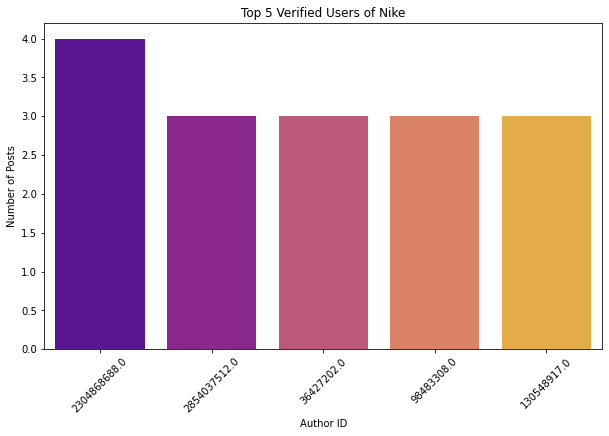

In [342]:
# Plotting the top 5 most active verified users of Nike
plt.figure(figsize=(10, 6))
sns.barplot(x=active_verified_user.index, y='count_of_post', data=active_verified_user, palette='plasma', order=active_verified_user.index)
plt.title('Top 5 Verified Users of Nike')
plt.xlabel('Author ID')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()


In [343]:
# Filter for verified users
verified_users = text_df1[text_df1['verified'] == True]

# Top 5 most active verified accounts
active_verified_user1 = verified_users['author_id'].value_counts().head(5)
active_verified_user1 = pd.DataFrame(active_verified_user1)
active_verified_user1 = active_verified_user1.rename(columns={"author_id": "count_of_post"})
print('Top 5 verified users of Adidas')
print(active_verified_user1)


Top 5 verified users of Adidas
           count_of_post
143245156             13
421024033              4
149123728              4
98483308               3
130548917              2


In [344]:
# Filter for unverified users
unverified_users = text_df[text_df['verified'] == False]

# Top 5 most active unverified accounts
active_unverified_user = unverified_users['author_id'].value_counts().head(5)
active_unverified_user = pd.DataFrame(active_unverified_user)
active_unverified_user = active_unverified_user.rename(columns={"author_id": "count_of_post"})
print('Top 5 unverified users of Nike')
print(active_unverified_user)


Top 5 unverified users of Nike
              count_of_post
1.570000e+18            373
1.571360e+18            140
1.565920e+18             77
1.565630e+18             75
1.610000e+18             73


In [345]:
# Filter for unverified users
unverified_users = text_df1[text_df1['verified'] == False]

# Top 5 most active unverified accounts
active_unverified_user1 = unverified_users['author_id'].value_counts().head(5)
active_unverified_user1 = pd.DataFrame(active_unverified_user1)
active_unverified_user1 = active_unverified_user1.rename(columns={"author_id": "count_of_post"})
print('Top 5 unverified users of Adidas')
print(active_unverified_user1)


Top 5 unverified users of Adidas
                     count_of_post
1495892640386191360            190
1299302958421737475             84
3846419537                      75
1591487320091508740             69
1619379689553788930             31


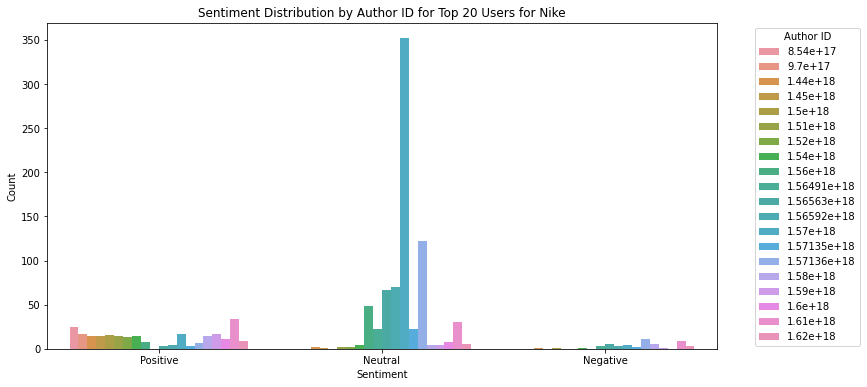

In [346]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 20 users
top_20_users = text_df['author_id'].value_counts().head(20).index

# Filter the dataset for the top 20 users
top_20_df = text_df[text_df['author_id'].isin(top_20_users)]

# Sentiment distribution by author ID for top 20 users
plt.figure(figsize=(12, 6))
sns.countplot(data=top_20_df, x='sentiment', hue='author_id')
plt.title("Sentiment Distribution by Author ID for Top 20 Users for Nike")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend(title='Author ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


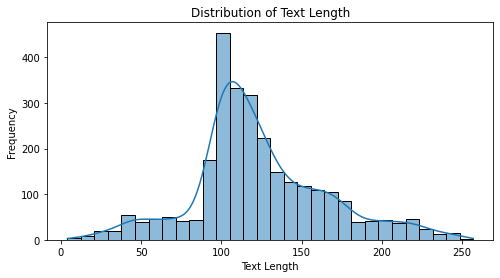

In [347]:
# for text length analysis
text_df['Text_Length'] = text_df['text'].str.len()  # Calculate text length
plt.figure(figsize=(8, 4))
sns.histplot(text_df['Text_Length'], bins=30, kde=True)
plt.title("Distribution of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

# Comparative Analysis of Tweet Activity Over Time: Nike vs. Adidas

In [348]:
# Convert 'created_at' column to datetime format
nike['created_at'] = pd.to_datetime(nike['created_at'], format='%d/%m/%Y %H:%M')


adidas['created_at'] = pd.to_datetime(adidas['created_at'], format='%Y-%m-%d %H:%M:%S')


In [349]:
# Ensure 'created_at' column is in DD/MM/YYYY format
nike['created_at'] = nike['created_at'].dt.strftime('%d/%m/%Y')
# Ensure 'created_at' column is in DD/MM/YYYY format
adidas['created_at'] = adidas['created_at'].dt.strftime('%d/%m/%Y')

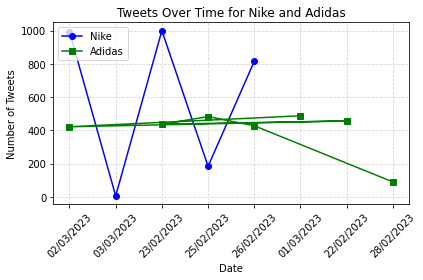

In [350]:
import matplotlib.pyplot as plt

# Analyze distribution of tweets over time for Nike
nike_tweet_counts = nike['created_at'].value_counts().sort_index()

# Plot for Nike
plt.plot(nike_tweet_counts, label='Nike', color='blue', marker='o')

# Analyze distribution of tweets over time for Adidas
adidas_tweet_counts = adidas['created_at'].value_counts().sort_index()

# Plot for Adidas
plt.plot(adidas_tweet_counts, label='Adidas', color='green', marker='s')

# Customize plot
plt.title('Tweets Over Time for Nike and Adidas')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-351-3f693bba43bb>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(nike_tweet_counts.index, rotation=45)
<ipython-input-351-3f693bba43bb>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(adidas_tweet_counts.index, rotation=45)


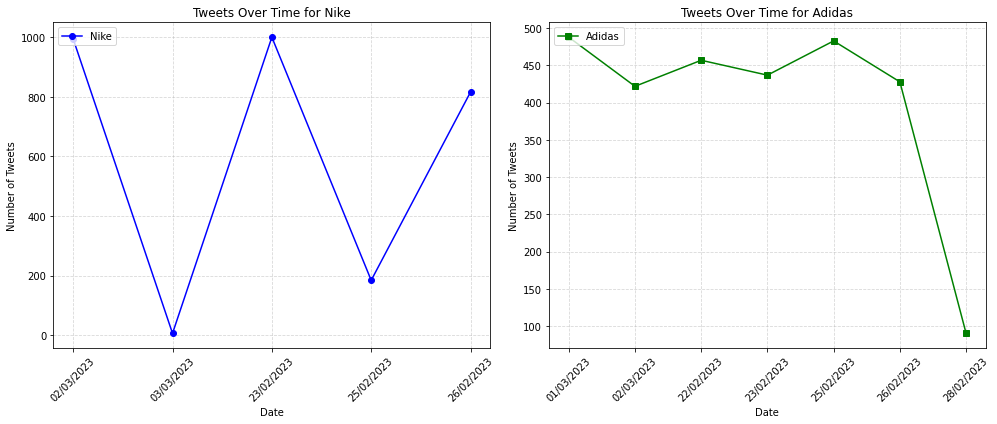

In [351]:
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Analyze distribution of tweets over time for Nike
nike_tweet_counts = nike['created_at'].value_counts().sort_index()

# Plot for Nike
ax1.plot(nike_tweet_counts, label='Nike', color='blue', marker='o')

# Customize plot for Nike
ax1.set_title('Tweets Over Time for Nike')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Tweets')
ax1.set_xticklabels(nike_tweet_counts.index, rotation=45)
ax1.legend(loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.5)

# Analyze distribution of tweets over time for Adidas
adidas_tweet_counts = adidas['created_at'].value_counts().sort_index()

# Plot for Adidas
ax2.plot(adidas_tweet_counts, label='Adidas', color='green', marker='s')

# Customize plot for Adidas
ax2.set_title('Tweets Over Time for Adidas')
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Tweets')
ax2.set_xticklabels(adidas_tweet_counts.index, rotation=45)
ax2.legend(loc='upper left')
ax2.grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


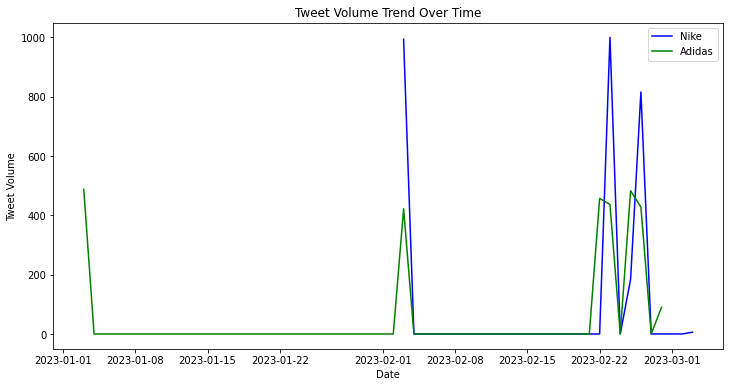

In [352]:
# Converting 'created_at' column to datetime
nike['created_at'] = pd.to_datetime(nike['created_at'])
adidas['created_at'] = pd.to_datetime(adidas['created_at'])

# Plotting tweet volume trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=nike.resample('D', on='created_at').size(), color='blue', label='Nike')
sns.lineplot(data=adidas.resample('D', on='created_at').size(), color='green', label='Adidas')
plt.title('Tweet Volume Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Volume')
plt.legend()
plt.show()


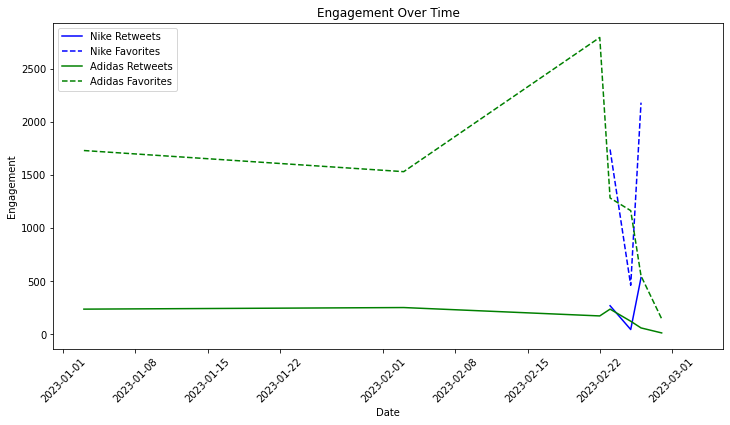

In [353]:
import matplotlib.pyplot as plt

# Convert 'created_at' column to datetime format for Nike
nike['created_at'] = pd.to_datetime(nike['created_at'])

# Convert 'created_at' column to datetime format for Adidas
adidas['created_at'] = pd.to_datetime(adidas['created_at'])

# Group data by date and sum the engagement metrics for Nike
nike_engagement_over_time = nike.groupby(nike['created_at'].dt.date)[['retweet_count', 'favorite_count']].sum()

# Group data by date and sum the engagement metrics for Adidas
adidas_engagement_over_time = adidas.groupby(adidas['created_at'].dt.date)[['retweet_count', 'favorite_count']].sum()

# Merge the engagement data for Nike and Adidas
engagement_over_time = pd.merge(nike_engagement_over_time, adidas_engagement_over_time, how='outer', left_index=True, right_index=True, suffixes=('_nike', '_adidas'))

# Plotting engagement over time for both Nike and Adidas
plt.figure(figsize=(12, 6))
plt.plot(engagement_over_time.index, engagement_over_time['retweet_count_nike'], label='Nike Retweets', color='blue')
plt.plot(engagement_over_time.index, engagement_over_time['favorite_count_nike'], label='Nike Favorites', linestyle='--', color='blue')
plt.plot(engagement_over_time.index, engagement_over_time['retweet_count_adidas'], label='Adidas Retweets', color='green')
plt.plot(engagement_over_time.index, engagement_over_time['favorite_count_adidas'], label='Adidas Favorites', linestyle='--', color='green')
plt.title('Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Engagement')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [354]:
#Tweet activity comparison between Nike and Adidas
import pandas as pd

# Filter tweets for Nike and Adidas brands
nike_tweets = text_df[text_df['text'].str.contains('Nike', case=False)]
adidas_tweets = text_df1[text_df1['text'].str.contains('Adidas', case=False)]

# Convert the 'created_at' column to datetime format for Nike
nike_tweets['created_at'] = pd.to_datetime(nike_tweets['created_at'])

# Convert the 'created_at' column to datetime format for Adidas
adidas_tweets['created_at'] = pd.to_datetime(adidas_tweets['created_at'])

# Group the tweets by date and count the number of tweets per day for Nike
nike_tweet_counts = nike_tweets.groupby(nike_tweets['created_at'].dt.date).size()

# Group the tweets by date and count the number of tweets per day for Adidas
adidas_tweet_counts = adidas_tweets.groupby(adidas_tweets['created_at'].dt.date).size()

# Display the number of tweets for Nike and Adidas
print("Number of tweets for Nike:")
print(nike_tweet_counts)

print("\nNumber of tweets for Adidas:")
print(adidas_tweet_counts)


Number of tweets for Nike:
created_at
2023-02-03    928
2023-02-23    968
2023-02-25    147
2023-02-26    728
2023-03-03      5
dtype: int64

Number of tweets for Adidas:
created_at
2023-02-22    457
2023-02-23    437
2023-02-25    483
2023-02-26    428
2023-02-28     90
2023-03-01    488
2023-03-02    422
dtype: int64


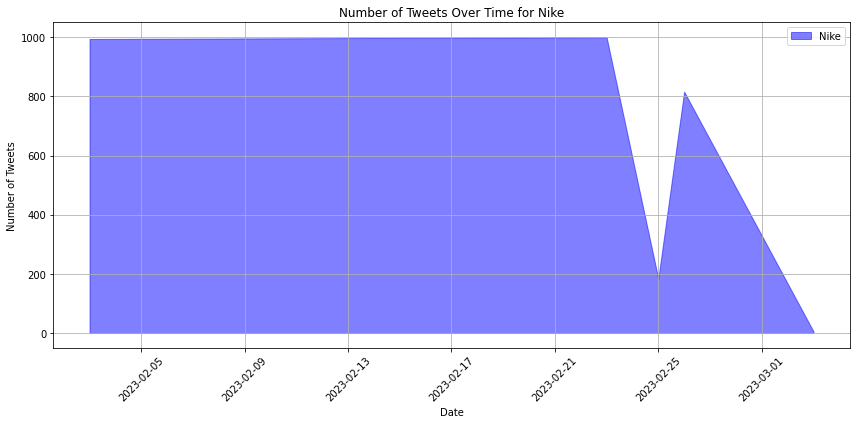

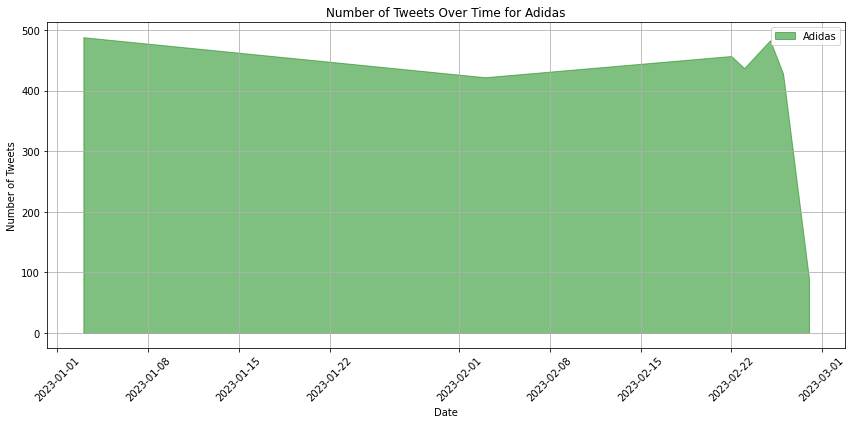

In [355]:
import matplotlib.pyplot as plt

# Group tweets by date and count the number of tweets for Nike and Adidas
nike_tweet_counts = nike.groupby(nike['created_at'].dt.date).size()
adidas_tweet_counts = adidas.groupby(adidas['created_at'].dt.date).size()

# Plot the number of tweets for Nike
plt.figure(figsize=(12, 6))
plt.fill_between(nike_tweet_counts.index, nike_tweet_counts.values, color='blue', alpha=0.5, label='Nike')
plt.title('Number of Tweets Over Time for Nike')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the number of tweets for Adidas
plt.figure(figsize=(12, 6))
plt.fill_between(adidas_tweet_counts.index, adidas_tweet_counts.values, color='green', alpha=0.5, label='Adidas')
plt.title('Number of Tweets Over Time for Adidas')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Based on the tweet activity comparison between Nike and Adidas, it appears that Nike generally maintains a higher level of engagement on most days, especially on February 3rd and 23rd. However, Adidas demonstrates a surge in tweet activity on specific dates such as February 25th and 26th, as well as March 1st.

Considering this, Nike could capitalize on its consistent engagement by leveraging it for brand promotions, product launches, or marketing campaigns. Additionally, Nike may want to investigate the factors contributing to the fluctuations in tweet activity on certain dates and strategize accordingly to maintain or improve engagement levels.

Furthermore, Nike could explore opportunities to enhance its social media presence, engage with its audience more effectively, and stay proactive in monitoring and responding to trends and conversations related to its brand.

Nike exhibits strong engagement overall, there is always room for improvement and optimization in social media strategies to maintain a competitive edge in the market.

In [356]:
# Calculating engagement as the sum of retweet_count and favorite_count
text_df['engagement'] = text_df['retweet_count'] + text_df['favorite_count']

# Find the top 5 tweets with the highest engagement
top_5_tweets = text_df.sort_values(by='engagement', ascending=False).head(5)

# Display the top 5 tweets
print("Top 5 Tweets for Nike:")
print(top_5_tweets[['tweet_id', 'text', 'engagement']])


Top 5 Tweets for Nike:
          tweet_id                                               text  \
1539  1.630000e+18  kimtaehyungs fashion tvn variety show jinnys k...   
1612  1.630000e+18  lucky male fan received jiyongs autograph nike...   
639   1.630000e+18  day 23 started hoarding shoes always purpose c...   
874   1.630000e+18  kmbappe fromthearchives brkicks airjordan mbap...   
1271  1.630000e+18  day 26 dear mama moms fav sneaker high scrunch...   

      engagement  
1539         704  
1612         543  
639          354  
874          298  
1271         206  


In [357]:
# Calculate engagement as the sum of retweet_count and favorite_count
text_df1['engagement'] = text_df1['retweet_count'] + text_df1['favorite_count']

# Find the top 5 tweets with the highest engagement
top_5_tweets = text_df1.sort_values(by='engagement', ascending=False).head(5)

# Display the top 5 tweets
print("Top 5 Tweets for Adidas:")
print(top_5_tweets[['tweet_id', 'text', 'engagement']])


Top 5 Tweets for Adidas:
                 tweet_id                                               text  \
788   1628273719478202371  huge sponsorship deal incoming team india cric...   
2147  1631142283792744449  get wallet ready blinks blackpink world tour b...   
1997  1631265792598712320  behindthescene yoncesuchmos ys1972 portrait ys...   
2400  1630995422176051221  unreleased adidas yeezy slide azure need drop ...   
404   1628576872010510337  article180223 retro trend back jennie bella ha...   

      engagement  
788         1705  
2147         527  
1997         520  
2400         409  
404          356  


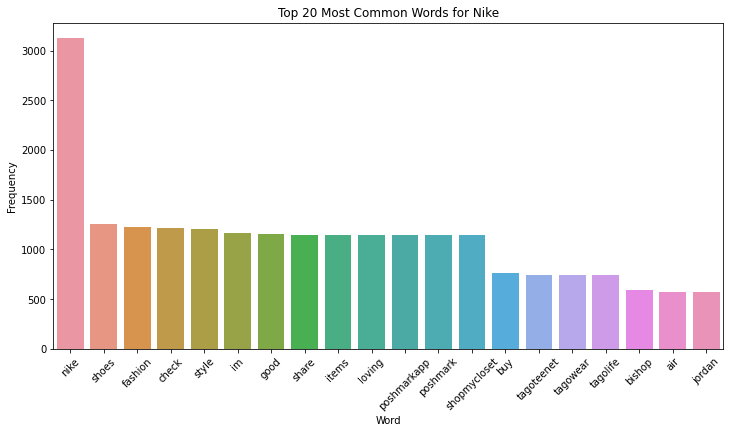

In [358]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate all text into a single string
all_text = ' '.join(text_df['text'])

# Split the text into individual words
words = all_text.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Get the most common words and their frequencies
most_common_words = word_counts.most_common(20)

# Plot the top N most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.title("Top 20 Most Common Words for Nike")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


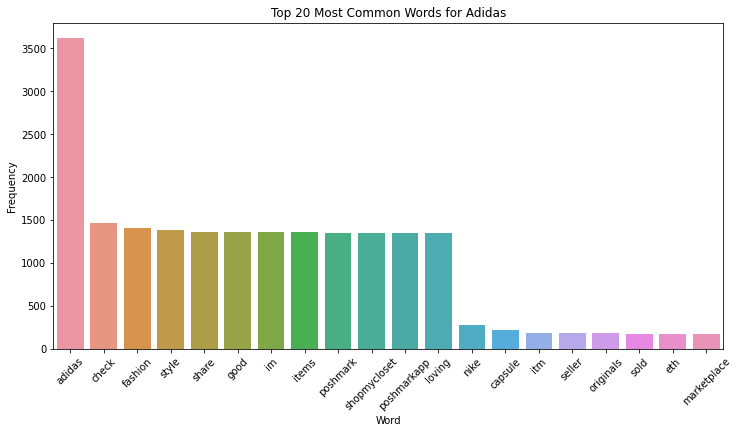

In [359]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate all text into a single string
all_text = ' '.join(text_df1['text'])

# Split the text into individual words
words = all_text.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Get the most common words and their frequencies
most_common_words = word_counts.most_common(20)

# Plot the top N most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.title("Top 20 Most Common Words for Adidas")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


# Topic Modeling:

Topic modeling is a technique used to discover abstract topics within a collection of documents (in this case, tweets). LDA is a popular topic modeling algorithm that assumes each document (tweet) is a mixture of various topics, and each topic is a probability distribution over words. By applying LDA, we can identify the underlying topics in the tweet data and the words associated with each topic, which helps in understanding the main themes or discussions related to a our target brand Nike with its comparison brand Adidas

Topics for Nike:
Topic 0:
['gt', 'basketball', 'kotd', 'max', 'nba', 'snkrs', 'jordan', 'sneakers', 'air', 'nike']

Topic 1:
['jd', 'offwhite', 'streetwear', 'fashion', 'design', 'box', 'got', 'disney', 'underarmour', 'nike']

Topic 2:
['poshmark', 'poshmarkapp', 'nike', 'items', 'check', 'fashion', 'share', 'style', 'good', 'im']

Topic 3:
['air', 'sneakers', 'jordan', 'bishop', 'tagolife', 'tagowear', 'tagoteenet', 'buy', 'nike', 'shoes']

Topic 4:
['check', 'shop', 'online', 'air', 'dunk', 'fashion', 'size', 'ebay', 'mens', 'nike']

Topics for Adidas:
Topic 0:
['adidassler', 'adidasvintage', 'casualscene', 'awaydays', 'check', 'trefoil', 'adifamily', 'adidasoriginals', 'ebay', 'adidas']

Topic 1:
['market', 'babolat', 'padel', 'paddle', 'sneakers', 'por', 'game', 'nike', 'shoes', 'adidas']

Topic 2:
['price', 'discount', 'ent22', 'blackwhite', 'publi', 'precio', 'team', 'shorts', 'mens', 'adidas']

Topic 3:
['shopmycloset', 'poshmark', 'adidas', 'items', 'im', 'good', 'check', 'shar

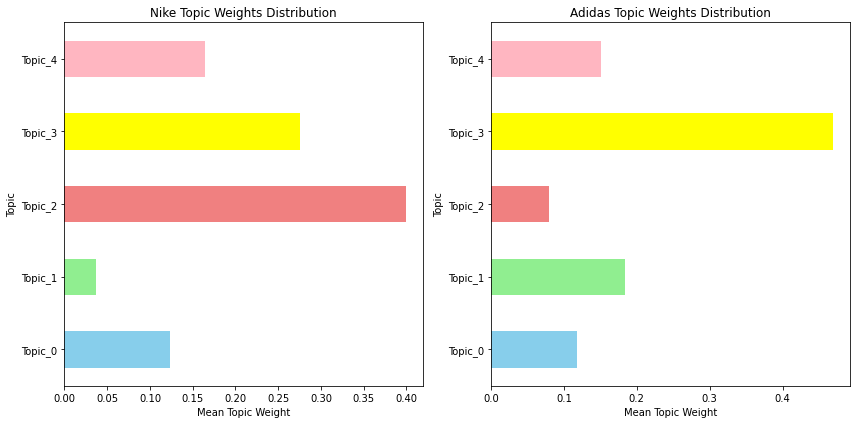

In [360]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Function to calculate topic weights for each tweet
def calculate_topic_weights(lda_model, vectorizer, text_data):
    # Transform the text data into document-topic distribution
    doc_topic_dist = lda_model.transform(vectorizer.transform(text_data))
    # Create a DataFrame to store topic weights for each tweet
    topic_weights_df = pd.DataFrame(doc_topic_dist, columns=[f"Topic_{i}" for i in range(lda_model.n_components)])
    return topic_weights_df

# Function for topic modeling
def topic_modeling(text_df, brand_name):
    # Filter tweets mentioning the brand
    brand_tweets = text_df[text_df['text'].str.contains(brand_name, case=False)]['text']

    # Create a count vectorizer
    vectorizer = CountVectorizer(max_features=1000, stop_words='english')

    # Fit and transform the data
    X = vectorizer.fit_transform(brand_tweets)

    # Create a Latent Dirichlet Allocation (LDA) model
    lda = LatentDirichletAllocation(n_components=5, random_state=42)

    # Fit the LDA model
    lda.fit(X)

    # Display the topics
    print(f"Topics for {brand_name}:")
    for topic_idx, topic in enumerate(lda.components_):
        print(f"Topic {topic_idx }:")
        print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
        print()
    
    # Calculate topic weights for brand tweets
    topic_weights = calculate_topic_weights(lda, vectorizer, brand_tweets)
    
    return topic_weights

# Perform topic modeling for Nike
nike_topic_weights = topic_modeling(text_df, 'Nike')

# Perform topic modeling for Adidas
adidas_topic_weights = topic_modeling(text_df1, 'Adidas')

# Plotting Nike and Adidas topic weights side by side horizontally
plt.figure(figsize=(12, 6))

# Nike topic weights
plt.subplot(1, 2, 1)
nike_topic_weights.mean().plot(kind='barh', color=['skyblue', 'lightgreen', 'lightcoral', 'yellow', 'lightpink'])
plt.title('Nike Topic Weights Distribution')
plt.xlabel('Mean Topic Weight')
plt.ylabel('Topic')

# Adidas topic weights
plt.subplot(1, 2, 2)
adidas_topic_weights.mean().plot(kind='barh', color=['skyblue', 'lightgreen', 'lightcoral', 'yellow', 'lightpink'])
plt.title('Adidas Topic Weights Distribution')
plt.xlabel('Mean Topic Weight')
plt.ylabel('Topic')

plt.tight_layout()
plt.show()


A higher mean weight for a particular topic suggests that this topic is more prevalent or dominant among those tweets. So, indeed, you can interpret the topic with the highest mean weight as the one that is more prevalent or "trending" within the tweets mentioning that brand.

Topics for Target Brand Nike:

Topic 0 :Basketball Sneakers:This topic includes words related to basketball culture, such as "basketball," "nba," "jordan," and "sneakers."

Topic 1: Streetwear and Fashion: This topic encompasses words associated with streetwear fashion trends, including "streetwear," "fashion," "design," and "offwhite."

Topic 2: Retail and Shopping:This topic revolves around retail activities and shopping discussions, with words like "poshmark," "shop," "online," and "check."It has highest mean weight suggesting that this is a trending topic.

Topic 3: Nike Products:This topic focuses on specific Nike products like "air," "jordan," "sneakers," and "shoes."

Topic 4 : Online Shopping Experience:This topic is about the online shopping experience for Nike products, with words such as "check," "shop," "online," and "ebay."

Topics for Comparison Brand Adidas:

Topic 0: Adidas Originals and Marketplace:This topic relates to Adidas Originals products and discussions about marketplaces like "opensea" and "marketplace."

Topic 1: Footwear and Collaboration:This topic revolves around Yeezy products, apparel discussions, and mentions of other brands like "nike" and "adidas."

Topic 2: Vintage Adidas and Sneakers:This topic focuses on vintage Adidas products, sneakers, and discussions about Adidas family products.

Topic 3: Adidas Football and Sportswear: This topic includes discussions about Adidas football kits, jerseys, and sportswear, alongside mentions of other brands like "nike."It has highest mean weight suggestiong that this is a trending topic.

Topic 4: Retail and Fashion Sharing:This topic centers on retail platforms like "poshmark," fashion sharing activities, and discussions about style and fashion.

These topic names aim to capture the main themes or topics discussed in the tweets related to Nike and Adidas based on the words associated with each topic.

In [361]:
pip install afinn

In [362]:
from afinn import Afinn

# Instantiate AFINN sentiment analyzer
afinn = Afinn()

# Topics and their associated words for Nike and Adidas
nike_topics = {
    'Basketball Sneakers': ['gt', 'basketball', 'kotd', 'max', 'nba', 'snkrs', 'jordan', 'sneakers', 'air', 'nike'],
    'Streetwear and Fashion':['jd', 'offwhite', 'streetwear', 'fashion', 'design', 'box', 'got', 'disney', 'underarmour', 'nike'],
    'Retail and Shopping': ['poshmark', 'poshmarkapp', 'nike', 'items', 'check', 'fashion', 'share', 'style', 'good', 'im'],
    'Nike Products': ['air', 'sneakers', 'jordan', 'bishop', 'tagolife', 'tagowear', 'tagoteenet', 'buy', 'nike', 'shoes'],
    'Online Shopping Experience': ['check', 'shop', 'online', 'air', 'dunk', 'fashion', 'size', 'ebay', 'mens', 'nike']
}

adidas_topics = {
    'Adidas Originals and Marketplace': ['originals', 'opensea', 'buyer', 'marketplace', 'eth', 'sold', 'seller', 'itm', 'capsule', 'adidas'],
    'Footwear and Collaboration': ['babyblues172001', 'yeezy', 'agadrianogoldschmied', 'team', 'shorts', 'publi', 'precio', 'nike', 'mens', 'adidas'],
    'Vintage Adidas and Sneakers': ['adidasvintage', 'trefoil', 'por', 'shoes', 'game', 'adifamily', 'check', 'adidasoriginals', 'ebay', 'adidas'],
    'Adidas Football and Sportswear': ['kit', 'amp', 'jersey', 'adidasfootball', '2023', 'football', 'nike', 'ad', 'available', 'adidas'],
    'Retail and Fashion Sharing': ['poshmarkapp', 'share', 'shopmycloset', 'poshmark', 'items', 'check', 'im', 'good', 'style', 'fashion']
}

# Function to perform sentiment analysis for each topic
def analyze_sentiment(topics):
    for topic, words in topics.items():
        # Calculate sentiment score for each word in the topic
        word_sentiments = [afinn.score(word) for word in words]
        # Aggregate sentiment scores for the topic
        topic_sentiment = sum(word_sentiments)
        # Determine sentiment label based on aggregated score
        sentiment_label = 'Positive' if topic_sentiment > 0 else 'Negative' if topic_sentiment < 0 else 'Neutral'
        # Print topic sentiment
        print(f"{topic}: {sentiment_label} (Sentiment Score: {topic_sentiment})")

# Perform sentiment analysis for Nike topics
print("Sentiment Analysis for Nike Topics:")
analyze_sentiment(nike_topics)

# Perform sentiment analysis for Adidas topics
print("\nSentiment Analysis for Adidas Topics:")
analyze_sentiment(adidas_topics)


Sentiment Analysis for Nike Topics:
Basketball Sneakers: Neutral (Sentiment Score: 0.0)
Streetwear and Fashion: Neutral (Sentiment Score: 0.0)
Retail and Shopping: Positive (Sentiment Score: 4.0)
Nike Products: Neutral (Sentiment Score: 0.0)
Online Shopping Experience: Neutral (Sentiment Score: 0.0)

Sentiment Analysis for Adidas Topics:
Adidas Originals and Marketplace: Neutral (Sentiment Score: 0.0)
Footwear and Collaboration: Neutral (Sentiment Score: 0.0)
Vintage Adidas and Sneakers: Neutral (Sentiment Score: 0.0)
Adidas Football and Sportswear: Neutral (Sentiment Score: 0.0)
Retail and Fashion Sharing: Positive (Sentiment Score: 4.0)


Here's what the results mean:

For Target brand Nike Topics:

1.Basketball Sneakers: The sentiment is neutral, meaning there is neither positive nor negative sentiment expressed in tweets related to basketball sneakers.

2.Streetwear and Fashion: Similar to basketball sneakers, the sentiment is neutral, indicating a lack of strong positive or negative sentiment in discussions about streetwear and fashion.

3.Retail and Shopping: The sentiment is positive, with a sentiment score of 4.0, suggesting that discussions about retail and shopping related to Nike are generally positive.

4.Nike Products: The sentiment is neutral, implying that tweets discussing specific Nike products have a balanced mix of positive and negative sentiment.

5.Online Shopping Experience: Similar to Nike products, the sentiment for the online shopping experience is neutral, indicating a lack of strong sentiment in either direction.


For Comparison brand Adidas Topics:

1.Adidas Originals and Marketplace: The sentiment is neutral, meaning that discussions about Adidas Originals products and marketplaces have a balanced mix of positive and negative sentiment.

2.Footwear and Collaboration: Similar to Adidas Originals, the sentiment for footwear and collaboration discussions is neutral, indicating a lack of strong sentiment.

3.Vintage Adidas and Sneakers: The sentiment is neutral, suggesting that discussions about vintage Adidas products and sneakers have a balanced mix of positive and negative sentiment.

4.Adidas Football and Sportswear: Similar to the previous topics, the sentiment for discussions about Adidas football and sportswear is neutral.

5.Retail and Fashion Sharing: The sentiment is positive, with a sentiment score of 4.0, indicating that discussions about retail and fashion sharing related to Adidas are generally positive.
Overall, these sentiment analysis results provide insights into the general sentiment expressed in tweets related to Nike and Adidas across different topics.

# Identifying a Micro-influencer for target brand NIKE

In [363]:
# Define criteria and assumptions
threshold_statuses_count = 10000  # Minimum number of statuses
min_followers_count = 100000  # Minimum followers count 100K
# Top Topics for nike
relevant_keywords = ['poshmark', 'poshmarkapp', 'nike', 'items', 'check', 'fashion', 'share', 'style', 'good', 'im']  

# Filter tweets containing relevant keywords and positive sentiment
relevant_tweets = text_df[(text_df['text'].str.contains('|'.join(relevant_keywords), case=False)) & 
                       (text_df['sentiment'] == 'Positive')]

# Filter users with a significant number of statuses and a moderate followers count
potential_micro_influencers = relevant_tweets[(relevant_tweets['statuses_count'] > threshold_statuses_count) & 
                                              (relevant_tweets['followers_count'] >= min_followers_count) &
                                              (relevant_tweets['verified'])]

# Sort potential micro-influencers based on followers_count and favourites_count in descending order
sorted_micro_influencers = potential_micro_influencers.sort_values(by=['listed_count', 'favourites_count'], ascending=False)

# Display the top 5 potential micro-influencers
micro_influencers = sorted_micro_influencers.head()
print()


In [364]:
micro_influencers.shape

(5, 19)

In [365]:
# Get unique author IDs of potential micro-influencers
unique_author_ids = micro_influencers['author_id'].unique()

# Display unique author IDs
print(unique_author_ids)


[22175551. 36427202.]


In [366]:
# Group by author_id and calculate the mean sentiment score for each unique author ID
unique_author_sentiment = micro_influencers.groupby('author_id')['polarity'].mean().reset_index()

# Display the sentiment scores for unique author IDs
print(unique_author_sentiment)


    author_id  polarity
0  22175551.0  0.346591
1  36427202.0  0.251010


<ipython-input-367-87efd9fb511b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_tweets['created_at'] = pd.to_datetime(author_tweets['created_at'])


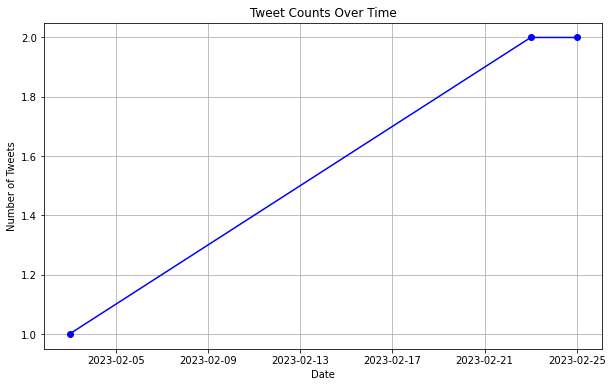

In [367]:
import matplotlib.pyplot as plt

# Filter tweets for the specified author IDs
author_tweets = nike[nike['author_id'].isin([22175551.0, 36427202.0])]

# Convert the 'created_at' column to datetime format
author_tweets['created_at'] = pd.to_datetime(author_tweets['created_at'])

# Group the tweets by date and count the number of tweets per day
tweet_counts = author_tweets.groupby(author_tweets['created_at'].dt.date).size()

# Plot the tweet counts over time
plt.figure(figsize=(10, 6))
tweet_counts.plot(kind='line', marker='o', color='b')
plt.title('Tweet Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()


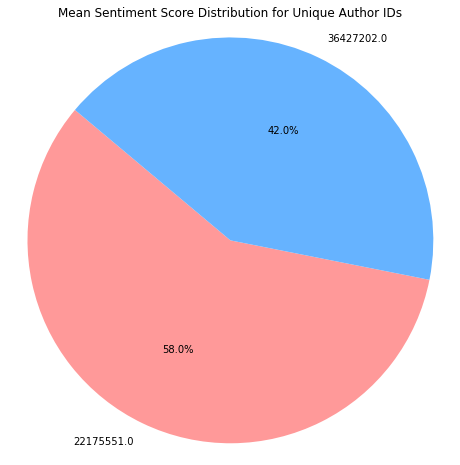

In [368]:
import matplotlib.pyplot as plt

# Group by author_id and calculate the mean sentiment score for each unique author ID
unique_author_sentiment = micro_influencers.groupby('author_id')['polarity'].mean().reset_index()

# Define custom colors for the pie chart
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Plot the sentiment scores as a pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(unique_author_sentiment['polarity'], labels=unique_author_sentiment['author_id'], autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Mean Sentiment Score Distribution for Unique Author IDs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


When evaluating potential micro-influencers based on polarity scores, which signify the sentiment conveyed in their posts, a higher polarity score indicates a stronger positive sentiment. In the context of the analysis, both potential micro-influencers exhibit positive polarity scores, indicating a tendency to share content with a positive sentiment. However, upon closer examination, the potential micro-influencer with the `author_id` 22175551.0 demonstrates a notably higher polarity score of 0.346591 compared to the polarity score of 0.251010 for the other potential micro-influencer with `author_id` 36427202.0. Therefore, from a sentiment perspective, the micro-influencer associated with `author_id` 22175551.0 emerges as the more favorable choice due to their higher polarity score, suggesting a stronger inclination towards sharing content with a positive sentiment. Consequently, in terms of sentiment analysis, the micro-influencer represented by `author_id` 22175551.0 is deemed preferable between the two candidates.